#### Theory of the fit:  
https://en.wikipedia.org/wiki/Non-negative_least_squares  
https://en.wikipedia.org/wiki/Tikhonov_regularization

See: 
https://scicomp.stackexchange.com/questions/10671/tikhonov-regularization-in-the-non-negative-least-square-nnls-pythonscipy  
for fit of underdetermined matrix

#### Test of Energy-Dose reconstruction (ENERGY_CONV)
The energy bins of the detector are summed up to find the total deposited energy per detector. The results are connected via a weighted sum in order to reconstruct the applied dose on the detectors.

#### Global dose type flag

In [1]:
HP0_07 = False
ENERGY_CONV = False
CFFF = True  # Conversion factors from file

#### Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import importlib
import sys
sys.path.insert(0, '../getConversionFactors/')

from IPython.display import display, Markdown, display_html
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Import support files

In [3]:
import plot_csv_support as pcs
reload(pcs)
import getConversionFactors as gcf
reload(gcf)
import getConversionFactors_poly as gcfp
reload(gcfp)
import getConversionFactors_ROOT as gcfr

Welcome to JupyROOT 6.12/06


#### Specify data folder and names

In [4]:
# Containing the measured data sets
inFolder = './PTBMay18/Energie/'
# inFolder = './PTB_Daten/Energie/'
if HP0_07:
    energyData = '01_Energien_Daten_0_07.txt'
else:
    energyData = '01_Energien_Daten.txt'
    
dataDict = {'Slot1': {}, 'Slot2': {}, 'Slot3': {}}

#### Read measurement data from file
Shows the dose which was directly measured with the dose meter, using the conversion factors which were set at measurement time

In [5]:
doseDf = pd.read_table('%s/%s' % (inFolder, energyData))
doseDf[doseDf < 0] = np.nan
display( doseDf )

realDose = list( doseDf['theo'] ) 
realDoseConv = [173.15, 191.07, 226.55, 688.03, 376.64, 154.8, 169.73]
dpxDose = list( doseDf['DPX'] )
energyListFile = list( doseDf['MeanEnergy'] )
energyListConv = [16.4, 20.3, 24.7, 47.9, 65, 83.1, 100]

Energy  MeanEnergy        DPX   theo
0       15        12.6     0.0000  166.7
1       20        16.4   199.9758  166.7
2       25        20.3   175.1819  166.7
3       30        24.7   165.3607  166.7
4       40        33.3   161.0616  166.7
5       60        47.9   146.0606  166.7
6       80        65.2   165.6320  166.7
7      100        83.2   179.4548  166.7
8      120       100.3   184.2199  166.7
9      150       117.7   189.9917  166.7
10     200       164.0   192.3831  166.7
11     250       207.5   192.5732  166.7
12     300       248.9   191.9127  166.7
13     662       662.0  1644.5700  166.7
14    1200      1250.0   981.1982  100.0

#### Calculate dose from loaded conversion factors

In [7]:
energyCountsDict = pcs.getEnergyCounts(inFolder, large=True)
if HP0_07:
    convFn = 'GeantAlpha_0_07.csv'
else:
    convFn = 'GeantAlpha_vacOnly.csv'
    
conversionFactors = np.asarray( pcs.getConversionFactorsFile(convFn) )
doseDictFile = pcs.getDose(energyCountsDict['energyCounts'], conversionFactors)
showDf = pd.DataFrame(np.transpose([energyCountsDict['energyList'], energyListFile, doseDictFile['doseUnc']]), columns=['Energy', 'Mean Energy', 'Dose'])
display( showDf )

Energy Mean Energy           Dose
0      15        12.6  222.10+/-0.08
1      20        16.4  207.24+/-0.10
2      25        20.3  206.58+/-0.12
3      30        24.7  190.08+/-0.13
4      40        33.3  172.66+/-0.16
5      60        47.9  164.05+/-0.23
6      80        65.2    172.2+/-0.4
7     100        83.2    183.7+/-0.6
8     120       100.3    115.6+/-0.5
9     150       117.7    105.2+/-0.5
10    200         164     76.1+/-0.5
11    250       207.5     87.7+/-0.6
12    300       248.9    109.5+/-0.7
13    662         662    202.9+/-1.3
14   1200        1250    117.5+/-1.0

#### Load simulated files and their doses

In [7]:
# Specify run directories
runDirThilo = '../getConversionFactors/runs_combined'
runDirIna = '../getConversionFactors/R10.90g'

# Specify dose data files
kermaFile = '../getConversionFactors/data_sets/kerma_div_fluence.dat'
if HP0_07:
    conversionFile = '../getConversionFactors/data_sets/hp0_07_data.dat'
else:
    conversionFile = '../getConversionFactors/data_sets/hp10_data.dat'

# Specify simulated fluences (in counts per cm**2)
fluenceThilo = 5. * 400000 * 1000 / (30**2)
fluenceIna = 6.887e6

# Get counts from simulated files
# ATTENTION: Using the same binEdges for both 
binEdges = gcf.binEdgesTh
outDictThilo = gcf.getAlpha(runDirThilo, kermaFile=kermaFile, conversionFile=conversionFile, fluence=fluenceThilo, binEdges=binEdges, plot=True, showResults=False)
outDictIna = gcf.getAlpha(runDirIna, kermaFile, conversionFile, fluenceIna, binEdges=binEdges, plot=False, showResults=False)

# Retrive important variables from result
energyIdxThilo, energyMatrixThilo, doseVectorThilo = outDictThilo['energyIdx'], outDictThilo['energyMatrix'], outDictThilo['doseVector']
energyIdxIna, energyMatrixIna, doseVectorIna = outDictIna['energyIdx'], outDictIna['energyMatrix'], outDictIna['doseVector']

10.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 886]
11.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11433]
12.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40914]
13.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68028]
14.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 76644]
16.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1860, 66282]
18.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 195, 25594, 30752]
20.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7876, 31690, 6056]
22.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 685, 24551, 9069, 2739]
24.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8836, 18221, 1722, 1667]
26.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18385, 4766, 851, 1405]
28.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17980, 1345, 588, 1041]
30.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 15747, 734, 399, 795]
32.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1371, 12494, 521, 360, 676]
34.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6014, 5998, 389, 286, 584]
36.0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7826, 2620, 341, 232,

TypeError: getAlpha() got multiple values for keyword argument 'binEdges'

#### Convert counts directly into dose
This method would only use three conversion factors in the end, but probably has a bad response

In [7]:
def getTotalEnergy(energyCounts, binEdges):
    binEdgeList = []
    for key in ['vac', 'al', 'sn']:
        binEdgeList += list( np.asarray(binEdges[key][:-1]) + np.diff(binEdges[key])/2 )

    binEdges = np.asarray( binEdgeList )
    energyList = []
    for i in range(3):
        energyList.append( np.apply_along_axis(np.sum, arr=(energyCounts*binEdges)[:,range(i*16, (i+1)*16)], axis=1) )
        
    return np.transpose( energyList )

def energyToDose(energySumList, conversionFactors):
    return np.apply_along_axis(np.sum, arr=np.asarray(energySumList) * np.asarray(conversionFactors), axis=1)
    
binEdges = gcf.binEdgesTh
energySumList = getTotalEnergy(energyCountsDict['energyCounts'], binEdges)
print(energyToDose(energySumList, [0.005, 0.002, 0.001]))


[8642096.0745  4247337.26375 2674036.39175 1562511.759    739330.98325
  466776.663    422739.45775  377034.19775  334677.48875  247408.7875
  187222.64575  149298.3705  1795848.39625 2722899.76975]


#### Get conversion factors for mean energies

In [ ]:
def getConversion(energy, conversionFile, angle='0'):
    if '10' in conversionFile:
        dfConversion = pd.read_table(conversionFile, comment='#', names=['energy', '0'], usecols=[0, 1])
    else:
        dfConversion = pd.read_table(conversionFile, comment='#', names=['energy', '0', '15', '30', '45', '60', '75'])
    return gcf.interpolate(dfConversion.energy, dfConversion[angle], energy)
        
res = getConversion(energyListFile, '../getConversionFactors/data_sets/hp0_07_data.dat', '0')
resDf0 = pd.DataFrame(list(zip(energyListFile, res)), columns=['Mean Energy', r'H_p / K_a'])
res = getConversion(energyListFile, '../getConversionFactors/data_sets/hp0_07_data.dat', '60')
resDf60 = pd.DataFrame(list(zip(energyListFile, res)), columns=['Mean Energy', r'H_p / K_a'])

print('Left: at 0deg, Right: at 60deg')
pcs.display_side_by_side(resDf0, resDf60)

### Poly Fit Section
#### Combine angle and normal measurements 

In [8]:
POLY_COMBO = True
POLY_ANGLE_ONLY = False

if POLY_ANGLE_ONLY:
    doseVectorPoly = []
    energyListPoly, energyCountsPoly = [], []
else:
    doseVectorPoly = realDose
    energyListPoly, energyCountsPoly = energyListFile, energyCountsDict['energyCounts']

if POLY_COMBO:
    if HP0_07:
        energyDataAngle = 'Energie_Daten_0_07.txt'
    else:
        energyDataAngle = '01_Energien_Daten.txt'
        
    # energyListPoly, energyListPoly, energyCountsPoly, energyCountsErrPoly, doseVectorPoly, angleListPoly = [list(item) for item in pcs.getCountsWrap('./PTB_Daten/Winkel/', energyDataAngle, header=['Energy', 'MeanEnergy', 'Soll', 'Winkel'], erlangen=False, angle=True)]
    energyListPoly, energyListPoly, energyCountsPoly, energyCountsErrPoly, doseVectorPoly = [list(item) for item in pcs.getCountsWrap('./PTB_Daten/Energie/', energyDataAngle, header=['Energy', 'MeanEnergy', 'theo'], erlangen=False, angle=False)]
    
    energyListPoly += list(energyListFile)
    energyCountsPoly += list(energyCountsDict['energyCounts'])
    doseVectorPoly += list(realDose)

#### Perform the fit

(array([1, 1, 1]), 99363.86148069732)
(array([1, 1, 2]), 82576.20027128648)
(array([1, 1, 3]), 50733.292259933456)
(array([1, 1, 4]), 313793990.29490983)
(array([1, 2, 1]), 45808.59938304446)
(array([1, 2, 2]), 45105.802300057796)
(array([1, 2, 3]), 21755.629621238735)
(array([1, 2, 4]), 313783537.1016094)
(array([1, 3, 1]), 21311.788118798522)
(array([1, 3, 2]), 12501.177415282296)
(array([1, 3, 3]), 18498.429541637102)
(array([1, 3, 4]), 321733808.46093434)
(array([1, 4, 1]), 7650.213255912955)
(array([1, 4, 2]), 9151.262684275674)
(array([1, 4, 3]), 36925.832065068644)
(array([1, 4, 4]), 3427841083.297441)
(array([2, 1, 1]), 47259.962215935564)
(array([2, 1, 2]), 23114.417950657124)
(array([2, 1, 3]), 14190.290031550154)
(array([2, 1, 4]), 313634271.64601415)
(array([2, 2, 1]), 38709.91642957632)
(array([2, 2, 2]), 17728.193080245364)
(array([2, 2, 3]), 20117.27643270774)
(array([2, 2, 4]), 313619028.4903721)
(array([2, 3, 1]), 4020.6141378624925)
(array([2, 3, 2]), 5404.88311773497

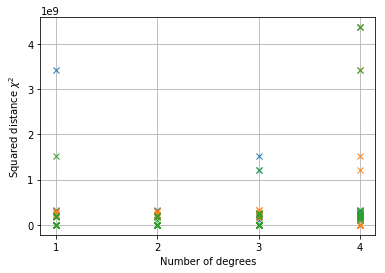

[-6.55543177e-08  7.81132475e-06 -1.20790806e-04 -2.19105720e-07
  1.26527393e-05 -2.83948881e-04 -3.90533778e-06  1.42792858e-03]


/usr/local/lib/python2.7/dist-packages/matplotlib/ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


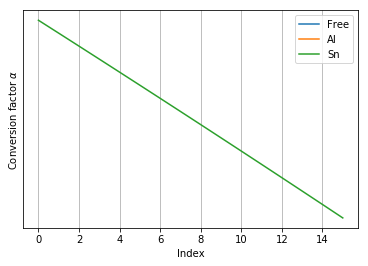

In [20]:
reload(gcfp)

if HP0_07:
    pdfOutPoly = 'alphaPoly_0_07.pdf'
else:
    pdfOutPoly = 'alphaPoly_10_temp.pdf'

x, y, z = np.mgrid[1:5,1:5,1:5] # np.mgrid[1:5,1:5,1:5]
degRange = np.dstack((x.flatten(), y.flatten(), z.flatten()))[0]
alphaPoly, polyParams, deg = gcfp.evaluatePolyFitMono(energyListPoly, energyCountsPoly, doseVectorPoly, 16, dev=True, DEGRange=degRange, save=pdfOutPoly)
fittedConversionFactors = alphaPoly
alphaPolyDf = pcs.conversionFactorsToDf( alphaPoly )

if HP0_07:
    alphaPolyDf.to_csv('conversionPolyFit_wSim_0_07.csv', header=None, index=False)
else:
    alphaPolyDf.to_csv('conversionPolyFit_wSim_10_temp.csv', header=None, index=False)

In [29]:
reload(gcfp)
# np.asarray(gcfp.alphaPoly(polyParams, 48, deg, dev=True, plot=True))
np.asarray(gcfp.alphaPolyDev(polyParams, deg, gcfp.binEdgesTh)).reshape((3, 16))

array([[1.92843144e-03, 1.18992015e-03, 7.31406798e-04, 4.41994195e-04,
        2.27183251e-04, 7.51741918e-05, 2.01071196e-05, 8.04039945e-05,
        1.08764708e-04, 1.09482222e-04, 9.38862249e-05, 6.73202401e-05,
        3.12376712e-05, 1.43375597e-05, 1.42655940e-06, 3.64947307e-05],
       [1.15039086e-02, 8.10506308e-03, 6.22117731e-03, 4.04297225e-03,
        3.21063515e-03, 2.47689563e-03, 1.28902257e-03, 9.46964072e-04,
        4.36707458e-04, 3.20439865e-04, 2.03759909e-04, 1.61852860e-04,
        1.28408461e-04, 1.02274560e-04, 1.32173866e-04, 1.63667233e-04],
       [3.75440047e-04, 5.12126869e-04, 6.17570989e-04, 7.11299095e-04,
        7.89405851e-04, 8.61654600e-04, 9.16329329e-04, 9.71004058e-04,
        1.02177345e-03, 1.07059017e-03, 1.11550156e-03, 1.16041294e-03,
        1.20337166e-03, 1.24437770e-03, 1.28343108e-03, 1.30295777e-03]])

In [25]:
print( alphaPoly )
print( polyParams, deg )

[1.92843144e-03 1.18992015e-03 7.31406798e-04 4.41994195e-04
 2.27183251e-04 7.51741918e-05 2.01071196e-05 8.04039945e-05
 1.08764708e-04 1.09482222e-04 9.38862249e-05 6.73202401e-05
 3.12376712e-05 1.43375597e-05 1.42655940e-06 3.64947307e-05
 1.15039086e-02 8.10506308e-03 6.22117731e-03 4.04297225e-03
 3.21063515e-03 2.47689563e-03 1.28902257e-03 9.46964072e-04
 4.36707458e-04 3.20439865e-04 2.03759909e-04 1.61852860e-04
 1.28408461e-04 1.02274560e-04 1.32173866e-04 1.63667233e-04
 3.75440047e-04 5.12126869e-04 6.17570989e-04 7.11299095e-04
 7.89405851e-04 8.61654600e-04 9.16329329e-04 9.71004058e-04
 1.02177345e-03 1.07059017e-03 1.11550156e-03 1.16041294e-03
 1.20337166e-03 1.24437770e-03 1.28343108e-03 1.30295777e-03]
[-6.55543177e-08  7.81132475e-06 -1.20790806e-04 -2.19105720e-07
  1.26527393e-05 -2.83948881e-04 -3.90533778e-06  1.42792858e-03] [3 3 2]


### Normal Fit
#### Print dose estimated via fitted conversion factors

In [26]:
# Load old conversion factors from file
conversionFactors = np.asarray(pcs.getConversionFactorsFile('conversionTotalFit_wSim.csv'))

# Get data to be fit and filter nan-entries
energyList, energyCounts = energyCountsDict['energyList'], energyCountsDict['energyCounts']
realDoseFilt, energyCountsFilt, energyListFilt, energyListFileFilt = pcs.filterNan(realDose, energyCounts, energyList, energyListFile)

# Fit the data and return new total alpha value
if not CFFF:
    # alphaList, kList = pcs.fitConversionSim(energyCountsFilt, realDoseFilt, [energyMatrixThilo, energyMatrixIna], [doseVectorThilo, doseVectorIna], conversionFactors, werr=False)
    # energyList, energyListFile, energyCounts, energyCountsErr, realDose, angleList = pcs.getCountsWrap(inFolder='./PTBMay18/Winkel/', energyFile='Energie_Daten_0_07.txt', header=['Energy', 'MeanEnergy', 'Soll', 'Winkel'], erlangen=False, angle=True)
    energyList, energyListFile, energyCounts, energyCountsErr, realDose = pcs.getCountsWrap(inFolder='./PTBMay18/Energie/', energyFile='01_Energien_Daten_0_07.txt', header=['Energy', 'MeanEnergy', 'theo'], erlangen=False, angle=False)
    # alphaList, kList = pcs.fitConversionSim(np.asarray(energyCounts), np.asarray(realDose), [energyCountsFilt, energyMatrixThilo, energyMatrixIna], [realDoseFilt, doseVectorThilo, doseVectorIna], conversionFactors, werr=False)
    alphaList, kList = pcs.fitConversionSim(np.asarray(energyCounts), np.asarray(realDose), [energyCountsFilt], [realDoseFilt], conversionFactors, werr=False)
    fittedConversionFactors = pcs.getAlphaTot(alphaList, kList)
else:
    if HP0_07:
        fittedConversionFactors = pcs.getConversionFactorsFile('smallPixelAnalysis/conversionSmall_wData0_07.csv') # r'GeantAlpha_0_07.csv') # r'conversionFit_wSim_0_07.csv')
    else:
        # fittedConversionFactors = pcs.getConversionFactorsFile(r'GeantAlpha_noSn.csv') # 'conversionFit_wSim_10.csv')
        fittedConversionFactors = pcs.getConversionFactorsFile(r'conversionPolyFit_wSim_10_temp.csv') # 'conversionFit_wSim_10.csv')

# Transform conversion factors to data frames and store new result in file
oldDf = pcs.conversionFactorsToDf(conversionFactors)
outDf = pcs.conversionFactorsToDf(fittedConversionFactors)
if not CFFF:
    if HP0_07:
        outDf.to_csv('conversionFit_wSim_0_07_May.csv', header=None, index=False)
    else:
        outDf.to_csv('conversionFit_wSim_10_angleFit_May.csv', header=None, index=False)

# Show old and new conversion factors side by side
display(Markdown('Fitted conversion factors. \n**Left:** old, **Right:** fitted'))
pcs.display_side_by_side( oldDf, outDf )
print()

# Dose calculated with fitted conversion factors
doseFitDict = pcs.getDose(energyCountsFilt, fittedConversionFactors)
doseFit, doseFitErr, doseFitUnc = doseFitDict['dose'], doseFitDict['doseErr'], doseFitDict['doseUnc']

# Calculate and show response
energyList, realDose, energyListFile, energyCounts = energyListFilt, realDoseFilt, energyListFileFilt, energyCountsFilt
doseDf = pd.DataFrame(np.transpose([energyList, realDose, doseFitUnc, np.array(doseFitUnc)/np.array(realDose)]),
                       columns=['Energy [keV]', 'Dose (set)', 'Dose (fit)', 'fit/set'])
doseDf = doseDf.dropna()
display(doseDf)

Fitted conversion factors. 
**Left:** old, **Right:** fitted

Slot1 
 Slot2 
 Slot3 
 
 
 
 
 0 
 0.002359 
 0.007243 
 0.001618 
 
 
 1 
 0.000892 
 0.004767 
 0.000156 
 
 
 2 
 0.001665 
 0.003187 
 0.000005 
 
 
 3 
 0.001557 
 0.003995 
 0.000047 
 
 
 4 
 0.001136 
 0.002938 
 0.000020 
 
 
 5 
 0.000788 
 0.001994 
 0.000284 
 
 
 6 
 0.000531 
 0.001947 
 0.000751 
 
 
 7 
 0.000458 
 0.001048 
 0.001163 
 
 
 8 
 0.000146 
 0.000431 
 0.001244 
 
 
 9 
 0.000137 
 0.000338 
 0.001730 
 
 
 10 
 0.000106 
 0.000263 
 0.001837 
 
 
 11 
 0.000044 
 0.000235 
 0.001766 
 
 
 12 
 0.000068 
 0.000143 
 0.001134 
 
 
 13 
 0.000039 
 0.000132 
 0.000943 
 
 
 14 
 0.000024 
 0.000038 
 0.000676 
 
 
 15 
 0.000016 
 0.000119 
 0.000733 
 
 
 
 
 
 
 Slot1 
 Slot2 
 Slot3 
 
 
 
 
 0 
 0.001928 
 0.011504 
 0.000375 
 
 
 1 
 0.001190 
 0.008105 
 0.000512 
 
 
 2 
 0.000731 
 0.006221 
 0.000618 
 
 
 3 
 0.000442 
 0.004043 
 0.000711 
 
 
 4 
 0.000227 
 0.003211 
 0.000789 
 
 
 5 
 0.000075 
 0.002477 
 0.000862 
 
 
 6 
 0.000020 
 0.001289 
 0.000916 
 
 
 7 
 0.000080 
 0.000947 
 0.000971 
 
 
 8 
 0.000109 
 0.000437 
 0.001022 
 
 
 9 
 0.000109 
 0.000320 
 0.001071 
 
 
 10 
 0.000094 
 0.000204 
 0.001116 
 
 
 11 
 0.000067 
 0.000162 
 0.001160 
 
 
 12 
 0.000031 
 0.000128 
 0.001203 
 
 
 13 
 0.000014 
 0.000102 
 0.001244 
 
 
 14 
 0.000001 
 0.000132 
 0.001283 
 
 
 15 
 0.000036 
 0.000164 
 0.001303

Energy [keV] Dose (set)     Dose (fit)          fit/set
0            20      166.7  168.19+/-0.10  1.0089+/-0.0006
1            25      166.7  152.45+/-0.12  0.9145+/-0.0007
2            30      166.7  174.59+/-0.13  1.0473+/-0.0008
3            40      166.7  171.48+/-0.15  1.0287+/-0.0009
4            60      166.7  167.27+/-0.24  1.0034+/-0.0015
5            80      166.7  167.63+/-0.31  1.0056+/-0.0018
6           100      166.7  160.73+/-0.34  0.9642+/-0.0020
7           120      166.7    158.0+/-0.4  0.9481+/-0.0022
8           150      166.7    164.5+/-0.4  0.9865+/-0.0024
9           200      166.7    175.7+/-0.4  1.0541+/-0.0026
10          250      166.7    169.5+/-0.4  1.0167+/-0.0026
11          300      166.7    162.7+/-0.4  0.9759+/-0.0026
12          662       1667   1668.0+/-2.2  1.0006+/-0.0013
13         1200     1000.2    998.7+/-1.6  0.9985+/-0.0016

#### Plot of true vs. reconstructed dose for the simulation

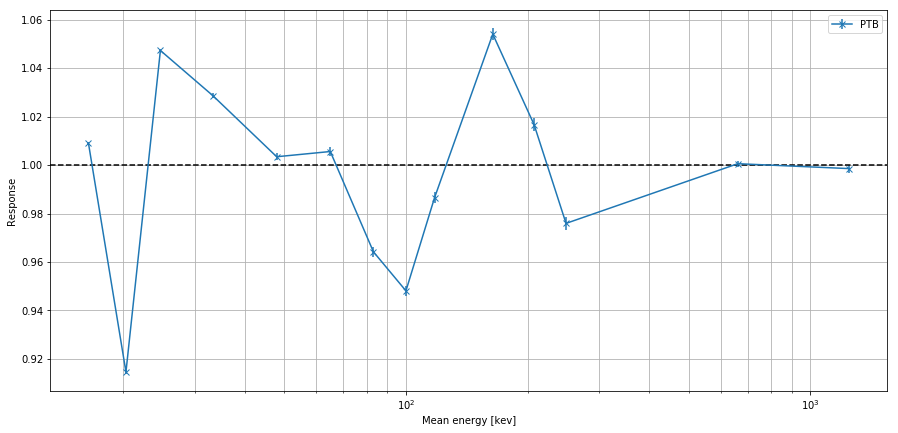

In [27]:
# Init plot
figSim, axSim = plt.subplots(figsize=[15, 7])

'''
alphaThilo, alphaIna = outDictThilo['alpha'], outDictIna['alpha']
axSim.errorbar(energyIdxThilo, np.dot(energyMatrixThilo, fittedConversionFactors)/doseVectorThilo, yerr=np.sqrt(np.dot(energyMatrixThilo, np.square(fittedConversionFactors)))/doseVectorThilo, label='Thilo')
axSim.errorbar(energyIdxIna, np.dot(energyMatrixIna, fittedConversionFactors)/doseVectorIna, yerr=np.sqrt(np.dot(energyMatrixIna, np.square(fittedConversionFactors)))/doseVectorIna, label='Ina')
'''
axSim.errorbar(energyListFile, np.dot(energyCounts, fittedConversionFactors)/np.array(realDose), yerr=np.sqrt(np.dot(energyCounts, np.square(fittedConversionFactors)))/np.array(realDose), label='PTB', marker='x')
# axSim.errorbar(energyListFilt, np.dot(energyCountsFilt, fittedConversionFactors)/np.array(realDoseFilt), yerr=np.sqrt(np.dot(energyCountsFilt, np.square(fittedConversionFactors)))/np.array(realDoseFilt), label='PTB', marker='x')

axSim.axhline(y=1, color='k', linestyle='--')
axSim.grid(True,which="both",ls="-")
axSim.set_xscale("log", nonposx='clip')

axSim.set_xlabel('Mean energy [kev]')
axSim.set_ylabel('Response')

leg = plt.legend()

#### Get reconstructed dose for each detector

In [15]:
from uncertainties import ufloat

def getDoseSingle(energyCounts, conversionFactors):
    energyCountsErr = np.sqrt( energyCounts )
    
    # Split conversion factors into three
    convLen = len( conversionFactors )
    conversionFactorsSplit = [conversionFactors[:convLen//3], conversionFactors[convLen//3:2*convLen//3], conversionFactors[2*convLen//3:]]
    energyCounts = np.asarray(energyCounts)
    energyCountsErr = np.asarray(energyCountsErr)
    energyCountsSplit = [energyCounts[:, range(convLen//3)], energyCounts[:, range(convLen//3, 2*convLen//3)], energyCounts[:, range(2*convLen//3, convLen)]]
    energyCountsErrSplit = [energyCountsErr[:, range(convLen//3)], energyCountsErr[:, range(convLen//3, 2*convLen//3)], energyCountsErr[:, range(2*convLen//3, convLen)]]
    
    doseDictList = []
    for k in range(3):
        dose = np.dot(energyCountsSplit[k], conversionFactorsSplit[k])
        doseErr = np.sqrt( np.dot(np.square(energyCountsErrSplit[k]), np.square(conversionFactorsSplit[k])) )
        doseUnc = [ufloat(dose[i], doseErr[i]) for i in range(len(dose))]
        doseDict = {'dose': dose, 'doseErr': doseErr, 'doseUnc': doseUnc}

        doseDictList.append( doseDict )
        
    return doseDictList

def mergeDoseSingle(doseFitSingleDictList, angleList=[]):
    titleList = ['Freifeld', 'Aluminium', 'Zinn']
    dfDoseSingleList = []
    for k, doseSingle in enumerate(doseFitSingleDictList):
        if angleList:
            dfDoseSingle = pd.DataFrame(np.transpose([energyListFile, angleList, doseSingle['dose'], doseSingle['doseErr']]), columns=['Mean Energy', 'Angle', 'Dose', 'Dose Error'])
        else:
            dfDoseSingle = pd.DataFrame(np.transpose([energyListFile, doseSingle['dose'], doseSingle['doseErr']]), columns=['Mean Energy', 'Dose', 'Dose Error'])
        dfDoseSingleList.append( dfDoseSingle )   
    
    if angleList:
        #dfMerge = dfDoseSingleList[0].merge(dfDoseSingleList[1], on='Mean Energy').merge(dfDoseSingleList[2], on='Mean Energy')
        dfMerge = pd.concat(dfDoseSingleList, axis=1)
    else:
        dfMerge = dfDoseSingleList[0].merge(dfDoseSingleList[1], left_on='Mean Energy', right_on='Mean Energy').merge(dfDoseSingleList[2], left_on='Mean Energy', right_on='Mean Energy')
    
    dfMerge = dfMerge.rename(index=str, columns={"Dose_x": "Free", "Dose Error_x": "", "Dose_y": "Al", "Dose Error_y": "", "Dose": "Sn", "Dose Error": ""})
    return dfMerge
        
dfMerge = mergeDoseSingle(getDoseSingle(energyCountsFilt, fittedConversionFactors))
dfRealDose = pd.DataFrame({'Real Dose': realDose}, index=range(len(realDose)))
display(dfMerge)
display(dfRealDose)
#display( pd.concat([dfMerge, dfRealDose]) )

Mean Energy        Free                    Al                    Sn  \
0          16.4  110.323230  0.044592   56.294911  0.097568    0.002597   
1          20.3   54.778362  0.031672  111.971763  0.138055    0.001648   
2          24.7   20.055769  0.018890  146.513893  0.158103    0.038828   
3          33.3    4.284957  0.010457  158.198606  0.166967    5.870211   
4          47.9   19.545689  0.040692  109.629455  0.144028   33.794293   
5          65.0   40.550325  0.096403   72.008509  0.119602   57.450925   
6          83.1   46.943206  0.149568   56.895801  0.105344   66.447391   
7         100.0   43.374796  0.183793   48.034452  0.095822   71.443049   
8         117.7   34.800006  0.183078   40.965772  0.088128   85.670300   
9         164.0   29.708212  0.214347   32.903271  0.079488  108.196628   
10        207.5   32.404260  0.218659   27.050012  0.073125  109.121739   
11        248.9   40.878680  0.255966   23.386174  0.068857  100.532786   
12        662.0  585.183021  1.678093  157.961104  0.187202  923.664304   
13       1250.0  529.662462  1.788341   97.641961  0.146796  373.132311   

              
0   0.001836  
1   0.001436  
2   0.006865  
3   0.084777  
4   0.209302  
5   0.273380  
6   0.287487  
7   0.293015  
8   0.319240  
9   0.361979  
10  0.370322  
11  0.367263  
12  1.579641  
13  0.819402

Real Dose
0       166.7
1       166.7
2       166.7
3       166.7
4       166.7
5       166.7
6       166.7
7       166.7
8       166.7
9       166.7
10      166.7
11      166.7
12     1667.0
13     1000.2

#### Plot evaluated doses

In [16]:
def plotDose(showDf, label, ylim=(0.6, 1.2), save=None, norm=False):
    fig, ax = plt.subplots() # figsize=[10, 5])
    dose = np.asarray([item.n for item in showDf.Dose])
    doseErr = np.asarray([item.s for item in showDf.Dose])
    realDose = np.asarray(showDf.RealDose)

    energyMeanList = np.asarray( showDf['MeanEnergy'] )
    energyList = np.asarray( showDf['Energy'] )

    response = dose/realDose
    responseErr = doseErr/realDose
    # If norm flag is set, normalize response to its value
    # from the Cs-measurement if available
    if norm:
        if 662 in energyList:
            idx = np.argwhere(np.asarray(energyList) == 662)[0]
            response /= response[idx]
            responseErr /= response[idx]
            
    ax.errorbar(energyMeanList, response, yerr=responseErr, ls='-', marker='x') # , label=label)

    # Acceptance region
    plt.axhspan(0, 0.7, facecolor='red', alpha=0.1)
    plt.axhspan(0.7, 1.7, facecolor='green', alpha=0.1)
    plt.axhspan(1.7, 3, facecolor='red', alpha=0.1)
    ax.axhline(y=0.7, color='k', linewidth=.5)

    plt.ylim(ylim)

    # Perfect response
    ax.axhline(y=1, color='k', linestyle='--')

    ax.grid()
    ax.set_xlim(10, 2000)
    ax.set_xscale("log", nonposx='clip')

    ax.set_xlabel('Energy [kev]')
    ax.set_ylabel('Response')

    plt.grid(True,which="both",ls="-")
    # plt.legend(loc='lower right')
    if label:
        plt.title(label)

    if save:
        outName = save
        outName += '_resp_vs_energy'
        
        if HP0_07:
            plt.title(r'$H_\mathrm{p}(0.07)$')
            outName += '_0_07'
        else:
            plt.title(r'$H_\mathrm{p}(10)$')
            outName += '_10'
        plt.savefig(outName + '.pdf')

In [17]:
def evaluateData(inFolder, energyFile, header, conversionFactors, erlangen=False, angle=False):
    fittedConversionFactors = conversionFactors
    if angle:
        energyList, energyListFile, energyCounts, energyCountsErr, realDose, angleList = pcs.getCountsWrap(inFolder=inFolder, energyFile=energyFile, header=header, erlangen=erlangen, angle=angle)
    else:
        energyList, energyListFile, energyCounts, energyCountsErr, realDose = pcs.getCountsWrap(inFolder=inFolder, energyFile=energyFile, header=header, erlangen=erlangen, angle=angle)
    
    doseDfTemp = pd.read_table('%s/%s' % (inFolder, energyFile), comment='#')
    # energyMeanList = list( doseDfTemp['Energie'] )

    doseDict = pcs.getDose(energyCounts, conversionFactors)
    dose, doseErr, doseUnc = doseDict['dose'], doseDict['doseErr'], doseDict['doseUnc']
    # realDose = np.array( doseDfTemp[header[1]] )

    if angle:
        energyList = np.asarray(energyList)
        return pd.DataFrame(np.transpose([[round(item, 1) for item in energyList[:,0]], energyListFile, angleList, realDose, doseUnc]), columns=['Energy', 'MeanEnergy', 'Angle', 'RealDose', 'Dose'])
    else:
        return pd.DataFrame(np.transpose([[round(item, 1) for item in energyList], energyListFile, realDose, doseUnc]), columns=['Energy', 'MeanEnergy', 'RealDose', 'Dose'])

#### Evaluate PTB data

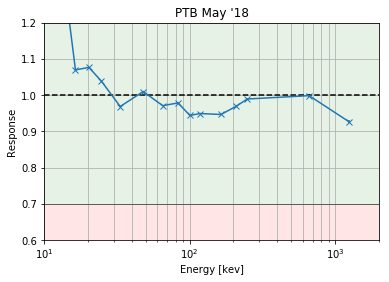

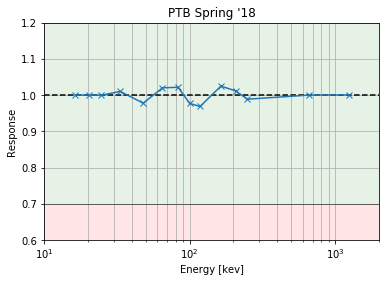

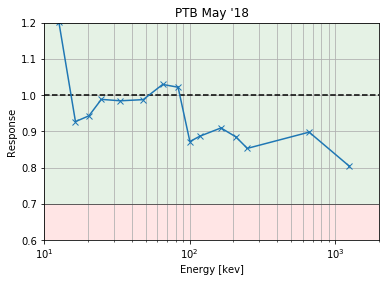

In [18]:
if HP0_07:
    energyDataPTB = '01_Energien_Daten_0_07.txt'
    convFacs = ['GeantAlpha_0_07.csv', 'conversionFit_wSim_0_07_angleFit_May.csv', 'conversionPolyFit_wSim_0_07.csv']
else:
    energyDataPTB = '01_Energien_Daten.txt'
    convFacs = ['GeantAlpha.csv', 'conversionFit_wSim_10.csv', 'conversionPolyFit_wSim_10_temp.csv']
    
titleList = ['PTB Spring \'18', 'PTB May \'18']
folderList = ['./PTB_Daten/Energie/', './PTBMay18/Energie/']
for conv in convFacs:
    convFac = pcs.getConversionFactorsFile(conv)
    for i in range(len(titleList)):
        showDfPTB = evaluateData(folderList[i], energyDataPTB, header=['Energy', 'MeanEnergy', 'theo'], conversionFactors=convFac)
        plotDose(showDfPTB, titleList[i], ylim=(0.6, 1.2), save=None, norm=False) # 'PTB')

en = np.asarray(showDfPTB.MeanEnergy, dtype=float)
dose = np.asarray([d.n for d in showDfPTB.Dose / showDfPTB.RealDose], dtype=float)
# np.savetxt('dosePTB.dat', np.asarray([en, dose]).T)

#### Evaluate C-spectra

In [13]:
if HP0_07:
    print('Attention: Data only defined for Hp(10)!')
    
showDfC = evaluateData('./PTB_Daten/C-Spektren/', '01_C-Spektren.txt', header=['Energie', 'Energie', 'Soll'], conversionFactors=fittedConversionFactors)
plotDose(showDfC, '', ylim=(0.5, 1.5)) # , save='C_spec')

#### Evaluate angular measurements

In [184]:
if HP0_07:
    energyData = 'Energie_Daten_0_07.txt'
    inFolder = './PTBMay18/Winkel/'
else:
    energyData = 'Energie_Daten.txt'
    inFolder = './PTBMay18/Winkel/'
    
showDfAng = evaluateData(inFolder, energyData, header=['Energy', 'MeanEnergy', 'Soll', 'Winkel'], conversionFactors=fittedConversionFactors, erlangen=False, angle=True)
display(showDfAng)

Energy MeanEnergy Angle RealDose           Dose
0      15       12.6     0      167  395.30+/-0.12
1      15       12.6    30      167  200.48+/-0.09
2      15       12.6    60     46.8  109.52+/-0.07
3      20       16.4     0      168  150.68+/-0.10
4      20       16.4    30      169  151.59+/-0.10
5      20       16.4    60      168  175.44+/-0.12
6      25       20.3     0      168  157.20+/-0.12
7      25       20.3    30      167  158.12+/-0.12
8      25       20.3    60      170  207.14+/-0.14
9      30       24.7     0      169  179.18+/-0.13
10     30       24.7    30      168  182.07+/-0.13
11     30       24.7    60      167  222.99+/-0.15
12     40       33.3     0      169  170.75+/-0.14
13     60       47.9     0      167  168.44+/-0.25
14     80       65.2     0      167  168.61+/-0.31
15     80       65.2    30      169  168.66+/-0.30
16     80       65.2    60      169  189.00+/-0.32
17    100       83.2     0      167  160.54+/-0.33
18    120        100     0      167  152.24+/-0.35
19    120        100    30      167  152.14+/-0.35
20    120        100    60      167    162.7+/-0.4
21    150      118.4     0      167    156.2+/-0.4
22    200      164.5     0      167    165.7+/-0.4
23    250      207.3     0      166    159.6+/-0.4
24    300      247.5     0      167    154.7+/-0.4
25    300      247.5    30      167    154.9+/-0.4
26    300      247.5    60      167    163.3+/-0.4
27    662        662     0      167    164.8+/-0.7
28    662        662    30      166    159.7+/-0.7
29    662        662    60      169    161.6+/-0.7
30   1250       1250     0      100     87.6+/-0.5
31   1250       1250    30      100     88.9+/-0.5
32   1250       1250    60      100     90.2+/-0.5

#### Contributions of each detector to the total dose for angular measurements

In [18]:
energyList, energyListFile, energyCounts, energyCountsErr, realDose, angleList = pcs.getCountsWrap('./PTBMay18/Winkel/', 'Energie_Daten_0_07.txt', header=['Energy', 'MeanEnergy', 'Soll', 'Winkel'], erlangen=False, angle=True)
doseSingle = getDoseSingle(energyCounts, fittedConversionFactors)
mergeDoseSingle(doseSingle, angleList)

Mean Energy  Angle          Sn            Mean Energy  Angle          Sn  \
0          12.6    0.0  144.423248  0.047517         12.6    0.0   19.564058   
1          12.6   30.0   98.605535  0.042952         12.6   30.0   22.342809   
2          12.6   60.0   42.498404  0.026715         12.6   60.0   20.132583   
3          16.4    0.0  120.858951  0.053415         16.4    0.0   54.826196   
4          16.4   30.0  116.922133  0.052442         16.4   30.0   59.861690   
5          16.4   60.0  116.959495  0.053070         16.4   60.0  105.651937   
6          20.3    0.0   84.474517  0.045519         20.3    0.0   77.857718   
7          20.3   30.0   82.690866  0.045047         20.3   30.0   81.496756   
8          20.3   60.0   86.712827  0.046152         20.3   60.0  120.940518   
9          24.7    0.0   57.281509  0.037035         24.7    0.0   97.182903   
10         24.7   30.0   56.898274  0.036905         24.7   30.0  100.634760   
11         24.7   60.0   60.330973  0.037977         24.7   60.0  131.665048   
12         33.3    0.0   32.265720  0.027708         33.3    0.0  121.031749   
13         47.9    0.0   16.240604  0.019774         47.9    0.0  128.839310   
14         65.2    0.0    8.765846  0.014218         65.2    0.0  119.884728   
15         65.2   30.0    8.956188  0.014371         65.2   30.0  123.867703   
16         65.2   60.0   10.110139  0.015262         65.2   60.0  142.399735   
17         83.2    0.0    6.776811  0.012519         83.2    0.0   93.419540   
18        100.0    0.0    5.638944  0.011428        100.0    0.0   71.261437   
19        100.0   30.0    5.694475  0.011483        100.0   30.0   72.121105   
20        100.0   60.0    6.250163  0.012036        100.0   60.0   78.689675   
21        118.4    0.0    5.033230  0.010818        118.4    0.0   57.760987   
22        164.5    0.0    3.902495  0.009562        164.5    0.0   44.767932   
23        207.3    0.0    3.176929  0.008637        207.3    0.0   38.577088   
24        247.5    0.0    2.670583  0.007915        247.5    0.0   33.962685   
25        247.5   30.0    2.680864  0.007929        247.5   30.0   34.047607   
26        247.5   60.0    2.820253  0.008132        247.5   60.0   35.877779   
27        662.0    0.0    1.706705  0.006223        662.0    0.0   23.030794   
28        662.0   30.0    1.644649  0.006119        662.0   30.0   22.703709   
29        662.0   60.0    1.627987  0.006097        662.0   60.0   22.993296   
30       1250.0    0.0    1.104566  0.005027       1250.0    0.0   14.066179   
31       1250.0   30.0    1.064778  0.004943       1250.0   30.0   14.442415   
32       1250.0   60.0    0.979222  0.004746       1250.0   60.0   14.272775   

              Mean Energy  Angle          Sn            
0   0.098994         12.6    0.0    0.005380  0.003122  
1   0.106128         12.6   30.0    0.007634  0.004301  
2   0.099947         12.6   60.0    0.008564  0.004627  
3   0.135435         16.4    0.0    0.008660  0.005016  
4   0.142840         16.4   30.0    0.000000  0.000000  
5   0.187535         16.4   60.0    0.002924  0.002126  
6   0.128802         20.3    0.0    0.001832  0.001545  
7   0.133447         20.3   30.0    0.001002  0.000909  
8   0.161433         20.3   60.0    0.000000  0.000000  
9   0.133195         24.7    0.0    0.010709  0.002840  
10  0.137100         24.7   30.0    0.007158  0.001707  
11  0.156591         24.7   60.0    0.011146  0.001049  
12  0.149982         33.3    0.0    0.266550  0.005343  
13  0.186008         47.9    0.0    7.913806  0.065940  
14  0.228302         65.2    0.0   34.861287  0.200433  
15  0.232684         65.2   30.0   29.911994  0.179549  
16  0.250302         65.2   60.0   35.480579  0.204642  
17  0.203541         83.2    0.0   63.067601  0.318759  
18  0.174259        100.0    0.0   72.312578  0.356613  
19  0.175255        100.0   30.0   71.863775  0.357377  
20  0.183328        100.0   60.0   76.345468  0.373442  
21  0.151053        118.4    

#### Evaluate Erlangen-spectra

Energy MeanEnergy RealDose           Dose
0      20         20   173.15  222.79+/-0.18
1      25         25   191.07  186.21+/-0.15
2      30         30   226.55  220.12+/-0.17
3      60         60   688.03    614.7+/-0.4
4      80         80   376.64    359.9+/-0.5
5     100        100    154.8    144.2+/-0.4
6     120        120   169.73    161.4+/-0.4
7     150        150   328.22    310.8+/-0.6
8     200        200    122.6    123.7+/-0.4
9     250        250   124.77    137.3+/-0.5
10    300        300   117.59    127.1+/-0.5

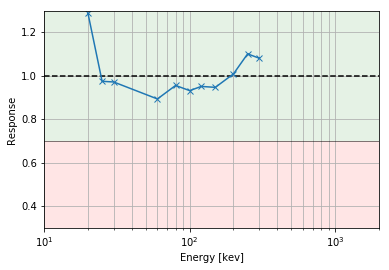

In [20]:
# importlib.reload(pcs)
showDfEr = evaluateData('./data/', '../doses.dat', header=['Energy', 'Energy', 'EPD/R'], conversionFactors=fittedConversionFactors, erlangen=True, angle=False)
plotDose(showDfEr[0:11], '', ylim=(0.3, 1.3)) # , save='erlangen')
display(showDfEr[0:11])

#### Dose rate data

In [ ]:
# NOTE: Not implemented yet!
showDfDR = evaluateData('./data/', '../doses.dat', header=['Energy', 'EPD/R'], conversionFactors=fittedConversionFactors, erlangen=True, angle=False)

#### Plot evaluated doses -- Angle edition

Energy MeanEnergy Angle RealDose           Dose
0      15       12.6     0      167  395.30+/-0.12
1      15       12.6    30      167  200.48+/-0.09
2      15       12.6    60     46.8  109.52+/-0.07
3      20       16.4     0      168  150.68+/-0.10
4      20       16.4    30      169  151.59+/-0.10
5      20       16.4    60      168  175.44+/-0.12
6      25       20.3     0      168  157.20+/-0.12
7      25       20.3    30      167  158.12+/-0.12
8      25       20.3    60      170  207.14+/-0.14
9      30       24.7     0      169  179.18+/-0.13
10     30       24.7    30      168  182.07+/-0.13
11     30       24.7    60      167  222.99+/-0.15
12     40       33.3     0      169  170.75+/-0.14
13     60       47.9     0      167  168.44+/-0.25
14     80       65.2     0      167  168.61+/-0.31
15     80       65.2    30      169  168.66+/-0.30
16     80       65.2    60      169  189.00+/-0.32
17    100       83.2     0      167  160.54+/-0.33
18    120        100     0      167  152.24+/-0.35
19    120        100    30      167  152.14+/-0.35
20    120        100    60      167    162.7+/-0.4
21    150      118.4     0      167    156.2+/-0.4
22    200      164.5     0      167    165.7+/-0.4
23    250      207.3     0      166    159.6+/-0.4
24    300      247.5     0      167    154.7+/-0.4
25    300      247.5    30      167    154.9+/-0.4
26    300      247.5    60      167    163.3+/-0.4
27    662        662     0      167    164.8+/-0.7
28    662        662    30      166    159.7+/-0.7
29    662        662    60      169    161.6+/-0.7
30   1250       1250     0      100     87.6+/-0.5
31   1250       1250    30      100     88.9+/-0.5
32   1250       1250    60      100     90.2+/-0.5

1


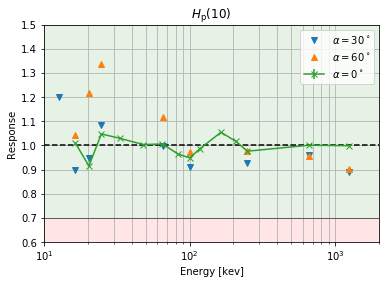

In [185]:
NORM = False

# def plotDose():
figEr, axEr = plt.subplots() # figsize=[10, 5])
display(showDfAng)
doseAng = np.asarray([item.n for item in showDfAng.Dose])
doseErrAng = np.asarray([item.s for item in showDfAng.Dose])
realDoseAng = np.asarray(showDfAng.RealDose)

energyMeanListAng = np.asarray( showDfAng['MeanEnergy'] )
energyListAng = np.asarray( showDfAng[['Energy', 'Angle']] )

# print(fitSplit)
# axEr.errorbar(energyMeanListC, list(doseC/np.array(realDoseC)), yerr=list(doseErrC/np.array(realDoseC)), label='C')

if NORM:
    normFac = (np.dot(energyCounts, fittedConversionFactors)/np.array(realDose))[np.argwhere(np.asarray(energyListFile) == 662)[0]][0]
else:
    normFac = 1
print(normFac)
    
for i in range(len(energyMeanListAng)):
    if energyListAng[i, 1] == 30:
        angMarker = 'v'
        colMarker = 'C0'
    elif energyListAng[i, 1] == 60:
        angMarker = '^'
        colMarker = 'C1'
    else:
        angMarker = 'x'
        colMarker = 'C2'
        continue
        
    axEr.errorbar(energyMeanListAng[i], doseAng[i]/realDoseAng[i] / normFac, yerr=doseErrAng[i]/realDoseAng[i] / normFac, ls='', color=colMarker, marker=angMarker, label='')
axEr.plot([], [], marker='v', ls='', label=r'$\alpha = 30^\circ$')
axEr.plot([], [], marker='^', ls='', label=r'$\alpha = 60^\circ$')
# axEr.plot([], [], marker='x', color='crimson', ls='', label='$0^\circ$')

# axEr.errorbar(energyMeanList[:-2], list(doseEr/np.array(realDoseEr))[:-2], yerr=list(doseErrEr/np.array(realDoseEr))[:-2], label='Erlangen')
axEr.errorbar(energyListFile, np.dot(energyCounts, fittedConversionFactors)/np.array(realDose) / normFac, yerr=np.sqrt(np.dot(energyCounts, np.square(fittedConversionFactors)))/np.array(realDose) / normFac, label=r'$\alpha = 0^\circ$', marker='x')

# Acceptance region
plt.axhspan(0, 0.7, facecolor='red', alpha=0.1)
plt.axhspan(0.7, 1.7, facecolor='green', alpha=0.1)
plt.axhspan(1.7, 3, facecolor='red', alpha=0.1)
axEr.axhline(y=0.7, color='k', linewidth=.5)

plt.ylim(0.6, 1.5)

# Perfect response
axEr.axhline(y=1, color='k', linestyle='--')

axEr.grid()
axEr.set_xlim(10, 2000)
axEr.set_xscale("log", nonposx='clip')

axEr.set_xlabel('Energy [kev]')
axEr.set_ylabel('Response')

plt.grid(True,which="both",ls="-")
plt.legend(loc='best')

if HP0_07:
    plt.title(r'$H_\mathrm{p}(0.07)$')
    plt.savefig('response_vs_energy_0_07.svg')
else:
    plt.title(r'$H_\mathrm{p}(10)$')
    plt.savefig('response_vs_energy_10.svg')

In [ ]:
print(energyListFile)
print(realDose)
print(np.dot(energyCounts, fittedConversionFactors))

## ODS Export
Export data to ods sheet

In [ ]:
def exportOds(dataDict, outname):
    data = OrderedDict()

    for i in range(1, 3+1):
        header = []
        energyMatrix = []
        energyMatrix.append(['Energy', 'Mean energy'] + ['Bin%d' % j for j in range(16)])
        k = 0
        for key, item in collections.OrderedDict(sorted(dataDict['Slot%d' % i].items())).items():
            header.append( key )
            energyMatrix.append( [key, float(energyListFile[k])] + list([int(it) for it in item]) )
            k += 1

        data.update({'Slot%d' % i: energyMatrix})
        # data.update({'Sheet%d' % i: np.transpose(energyMatrix)})
        display(pd.DataFrame( np.transpose(energyMatrix) ))

    save_data(outname, data)

## kVp to Mean Energy

In [29]:
import scipy.optimize

def kVpToMean(energy):
    kVp = [15, 20, 25, 30, 40, 60, 80, 100, 120, 150, 200, 250, 300]
    mean = [12.6, 16.4, 20.3, 24.7, 33.3, 47.9, 65.2, 83.2, 100.3, 117.7, 164.0, 207.5, 248.9]
    
    def linear(x, m, t):
        return m*x + t
    
    popt, pcov = scipy.optimize.curve_fit(linear, kVp, mean)
    return linear(energy, *popt)

en = np.linspace(15, 1200, 100)
plt.plot(en, kVpToMean(en))

## Single Pixel Analysis
Get the spectrum of each pixel

In [114]:
import os, re

def getCombinedBins(inFolder, angle=None):
    dataDict = {'Slot1': {}, 'Slot2': {}, 'Slot3': {}}
    for fn in os.listdir(inFolder):
        if os.path.isfile(inFolder + fn) and fn.endswith('.csv'):
            if angle is None:
                nameSplit = fn.split('.')[0].split('_')
                slotType, energy = nameSplit[-1], nameSplit[0]
            else:
                nameSplit = fn.split('.csv')[0].split('_')
                energy, ang, slotType = nameSplit
                ang = int(ang)
                if ang != angle:
                    continue
            
            energy = int(re.sub("\D","",energy)) 

            data = np.flip(np.asarray(pd.read_csv(inFolder + fn, header=None), dtype=float), axis=1)

            #if angle:
            #    dataDict[slotType][(energy, int(ang))] = data
            #else:
            dataDict[slotType][energy] = data

    return dataDict

def isLarge(idx):
    # Get x coordinate from idx
    x = np.mod(idx, 16)
    return np.where(np.isin(x, [0, 1, 14, 15]), False, True)

def plotHistIdx(dataDict, edges, slot=1, idx=0):
    d = dataDict['Slot%d' % slot]
    largeIdx = isLarge( np.arange(256) )
    fig, ax = plt.subplots(figsize=(10, 5))
    
    for energy in sorted(d.keys()):
        h = d[energy][largeIdx][idx]
        try:
            ax.step(edges[:-1], h / np.sum(h), where='post', label='%d keV' % energy)
        except:
            return
    plt.legend()
    plt.show()
    plt.close(fig)
    
def getHistMean(edges, h):
    return np.nansum((np.asarray(edges[:-1]) + 0.5*np.diff(edges))*h)/np.sum(h)
    
def plotHistEnergy(dataDict, edges, energy, ROOT=False, slot=1, idx=0):
    d = dataDict['Slot%d' % slot]
    largeIdx = isLarge( np.arange(256) )
    fig, ax = plt.subplots(figsize=(10, 5))
    
    h = np.asarray( d[energy][largeIdx][idx] )
    hMean = getHistMean(edges, h)
    ax.step(edges[:-1], h, where='post')
    ax.axvline(x=hMean, ls='--', color='k')
    
    # Repeat if ROOT file is present
    if ROOT:
        hR = np.asarray( ROOT['Slot%d' % slot][energy][idx] )
        hRMean = getHistMean(edges, h)
        ax.step(edges[:-1], hR / np.nanmax(hR) * np.nanmax(h), where='post')
        ax.axvline(x=hRMean, ls='--', color='k')

    ax.set_ylim(0, 1.1*np.max(d[energy][largeIdx]))
    fig.suptitle('Large Pixel #%d, Mean = %.2f keV' % (idx, hMean))
    plt.show()
    plt.close(fig)
    
def getFluence(energy, dose):
    gcfFolder = '../getConversionFactors/'
    kermaFile = gcfFolder + 'data_sets/kerma_div_fluence.dat'
    conversionFile = gcfFolder + 'data_sets/hp10_data.dat'
    
    energy = np.asarray( energy )
    energy = np.asarray( list(kVpToMean(energy[energy < 662])) + list(energy[energy >= 662]) )
    fluence = np.zeros(len(energy))
    fluence.fill(1)
    return dose / gcf.getDose(kermaFile, conversionFile, energy, fluence, plot=True)

def plotHistInfo(dataDicts, edgesDict, ROOT=False, doseNorm=None, norm=False, firstNorm=False, xlim=None, ylim=None, labelList=None):
    outList = []
    for idx, dataDict in enumerate(dataDicts):
        if ROOT[idx]:
            largeIdx = np.asarray([True] * 192)
        else:
            largeIdx = isLarge( np.arange(256) )
        
        edgeLabels = ['vac', 'al', 'sn']
        outDictSlot = {}
        for slot in range(1, 3 + 1):
            edges = edgesDict[edgeLabels[slot - 1]]
            d = dataDict['Slot%d' % slot]

            # Get energy axis
            energyAx = np.asarray(sorted(d.keys()))
            if not ROOT[idx]:
                energyAx = list(kVpToMean(energyAx[energyAx < 662])) + list(energyAx[energyAx >= 662])

            hMeanList, hStdList = [], []
            NMeanList, NStdList = [], []
            for energy in sorted(d.keys()):
                hMean, N = [], []
                for h in d[energy][largeIdx]:
                    hm = getHistMean(edges, h)
                    if not np.sum(h):
                        continue
                    hMean.append( hm )
                    N.append(np.sum(h))

                hMean = np.asarray( hMean )
                N = np.asarray( N )
                hMean[hMean == 0], N[N == 0] = np.nan, np.nan

                if np.nansum(N) > 100:
                    hMeanList.append( np.nanmean(hMean) ), hStdList.append( np.nanstd(hMean) )
                    NMeanList.append( np.nanmean(N) ), NStdList.append( np.nanstd(N) )
                else:
                    hMeanList.append( np.nan ), hStdList.append( np.nan )
                    NMeanList.append( np.nan ), NStdList.append( np.nan )

            hMeanList, hStdList = np.asarray(hMeanList), np.asarray(hStdList)
            NMeanList, NStdList = np.asarray(NMeanList), np.asarray(NStdList)

            if not ROOT[idx] and doseNorm is not None:
                doseNorm = np.asarray( doseNorm )
                NMeanList /= doseNorm
                NStdList /= doseNorm

            if firstNorm:
                if slot == 1:
                    print( np.argwhere(np.asarray(sorted(d.keys())) == 30) )
                    enNorm = 30
                    if ROOT[idx]:
                        enNorm = 25
                    hMeanNorm = hMeanList[np.argwhere(np.asarray(sorted(d.keys())) == enNorm).flatten()] # np.nanmean( hMeanList )
                    NMeanNorm = NMeanList[np.argwhere(np.asarray(sorted(d.keys())) == enNorm).flatten()] # np.nanmean( NMeanList )
            elif norm:
                hMeanNorm = np.nanmean(hMeanList)
                NMeanNorm = np.nansum(N) # np.nanmedian(NMeanList)
            else:
                hMeanNorm = np.zeros( len(hMeanList) )
                hMeanNorm.fill(1)
                NMeanNorm = np.zeros( len(NMeanList) )
                NMeanNorm.fill(1)
                
            outDict = {'energy': energyAx, 'hMean': hMeanList / hMeanNorm, 'hStd': hStdList / hMeanNorm, 'NMean': NMeanList / NMeanNorm, 'NStd': NStdList / NMeanNorm}
            outDictSlot['Slot%d' % slot] = outDict
        outList.append( outDictSlot )
                
    # Plot section
    if labelList is None:
        labelList = [None] * len(outList)
    
    # = Single plots =    
    for outSlot in outList:
        hfig, hax = plt.subplots(figsize=(10, 5))
        Nfig, Nax = plt.subplots(figsize=(10, 5))

        hax.set_xscale("log", nonposx='clip'), hax.set_yscale("log", nonposy='clip')
        Nax.set_xscale("log", nonposx='clip'), Nax.set_yscale("log", nonposy='clip')

        for slot in range(1, 3 + 1):
            out = outSlot['Slot%d' % slot]
        
            energyAx, hMean, hStd, NMean, NStd = out['energy'], out['hMean'], out['hStd'], out['NMean'], out['NStd']
            hax.plot(energyAx, hMean, marker='x', label='Slot%d' % slot, color='C%d' % (slot - 1))
            hax.fill_between(energyAx, hMean - hStd, hMean + hStd, alpha=.5, color='C%d' % (slot - 1))
            
            Nax.plot(energyAx, NMean, marker='x', label='Slot%d' % slot, color='C%d' % (slot - 1))
            Nax.fill_between(energyAx, NMean - NStd, NMean + NStd, alpha=.5, color='C%d' % (slot - 1))
    
        hax.legend(loc='best')
        Nax.legend(loc='best')
        hax.set_xlabel('XRT Energy (keV)')
        hax.set_ylabel(('Normalized ' if firstNorm or norm else '') + 'Mean Energy (keV)')
        Nax.set_xlabel('XRT Energy (keV)')
        Nax.set_ylabel(('Normalized ' if firstNorm or norm else '') + 'Mean Counts')

        hax.grid(which='both'), Nax.grid(which='both')

        if len(xlim):
            hax.set_xlim(xlim[0], xlim[1])
            Nax.set_xlim(xlim[0], xlim[1])

        # if len(ylim):
        #    hax.set_ylim(ylim[0], ylim[1])
        #    Nax.set_ylim(ylim[0], ylim[1])

        plt.show()
        plt.close(hfig), plt.close(Nfig)

    # = Multi plots =
    if len(outList) < 2:
        return

    colorList = ['#15517A', '#B85B0A', '#1C661C']
    for dataLabel in ['h', 'N']:
        for slot in range(1, 3 + 1):
            fig, ax = plt.subplots(2, 1, figsize=(12, 5), sharex=True)
            ax[0].set_xscale("log", nonposx='clip'), ax[0].set_yscale("log", nonposy='clip')
            ax[1].set_xscale('log', nonposx='clip')

            energyList, hMeanList = [], []
            for idx, outSlot in enumerate(outList):
                if idx == 0:
                    cList = ['C0', 'C1', 'C2']
                    alpha=.75
                else:
                    cList = colorList
                    alpha = 1.

                out = outSlot['Slot%d' % slot]
                energyAx, hMean, hStd = out['energy'], out['%sMean' % dataLabel], out['%sStd' % dataLabel]
                energyList.append( energyAx ), hMeanList.append( hMean )

                ax[0].plot(energyAx, hMean, color=cList[slot - 1], alpha=1., label=labelList[idx])
                ax[0].fill_between(energyAx, hMean - hStd, hMean + hStd, alpha=.5, color=cList[slot - 1], label=labelList[idx])

            # Interpolate to get same length for data
            energyMin = max([energy[0] for energy in energyList])
            energyMax = min([energy[-1] for energy in energyList])
            energyIdx = np.asarray(energyList[np.argmin([len(energy) for energy in energyList])])
            energyIdx = energyIdx[np.logical_and(energyIdx >= energyMin, energyIdx <= energyMax)]

            hDataIntList = []
            for idx in range(len(energyList)):
                f = scipy.interpolate.interp1d(energyList[idx], hMeanList[idx])
                hDataInt = f(energyIdx)
                hDataIntList.append( hDataInt )

            # Get only first two entries
            hDataInt1, hDataInt2 = hDataIntList[:2]
            hDataInt1, hDataInt2 = np.asarray(hDataInt1), np.asarray(hDataInt2)

            # Calculate relative difference
            res = (hDataInt1 - hDataInt2) / hDataInt2
            ax[1].plot(energyIdx, res, marker='x', color='C%d' % (slot - 1))
            ax[1].axhline(y=0, ls='--', color='k')

            ax[0].grid(which='both')
            ax[1].grid(which='both')
            
            ax[1].set_xlabel('XRT Energy (keV)')
            if dataLabel == 'h':
                ax[0].set_ylabel(('Normalized ' if firstNorm or norm else '') + 'Mean Energy (keV)')
            else:
                ax[0].set_ylabel(('Normalized ' if firstNorm or norm else '') + 'Mean Counts')
            ax[1].set_ylabel('Residual')
                
            if any(labelList):
                plt.legend()
            fig.suptitle('Slot%d' % slot)
            plt.show()

[15, 20, 25, 30, 40, 60, 80, 100, 120, 150, 200, 250, 300, 662, 1200]
[1640, 526, 310, 231, 180, 160, 152, 153, 154, 156, 160, 160, 161, 168, 101]


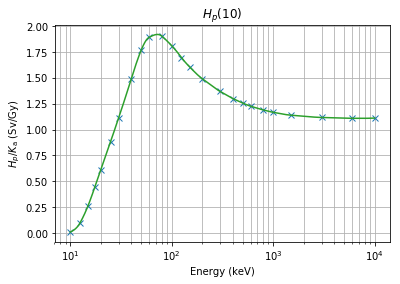

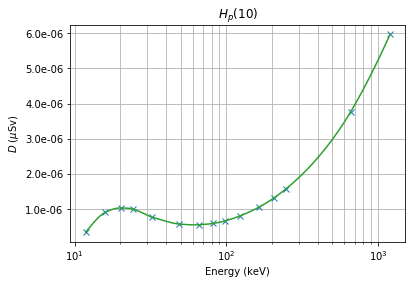

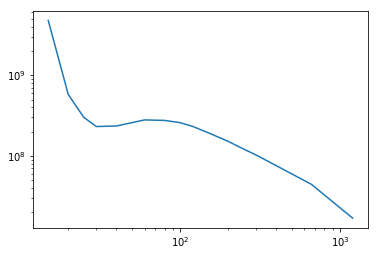

In [115]:
dataDictSpring = getCombinedBins('./PTB_Daten/Energie/')
dataDictMay = getCombinedBins('./PTBMay18/Energie/')
dataDictMayAngle30 = getCombinedBins('./PTBMay18/Winkel/', angle=30)
dataDictMayAngle60 = getCombinedBins('./PTBMay18/Winkel/', angle=60)

print(sorted(dataDictMay['Slot1'].keys()))
print(realDose)
fluenceNorm = getFluence(sorted(dataDictMay['Slot1'].keys()), realDose)
plt.loglog(sorted(dataDictMay['Slot1'].keys()), fluenceNorm)

In [41]:
edges = gcf.binEdgesTh
interact(lambda idx: plotHistIdx(dataDictSpring, edges['vac'], slot=1, idx=idx), idx=widgets.IntSlider(min=0, max=191, step=1, value=1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J2lkeCcsIG1heD0xOTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW50ZXLigKY=


<function __main__.<lambda>>

In [30]:
play = widgets.Play(
    interval=300,
    value=0,
    min=0,
    max=191,
    step=1,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider(min=0, max=191, step=1)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.HBox([play, slider])

energyList = sorted(dataDictSpring['Slot1'].keys())
interact(lambda idx: plotHistEnergy(dataDictMay, edges['vac'], 15, slot=1, idx=idx), idx=play)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KFBsYXkodmFsdWU9MCwgZGVzY3JpcHRpb249dSdQcmVzcyBwbGF5JywgaW50ZXJ2YWw9MzAwLCBtYXg9MTkxKSwgT3V0cHV0KCkpLCBfZG9tX2NsYXNzZXPigKY=


<function __main__.<lambda>>

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in double_scalars


[[3]]
[[3]]


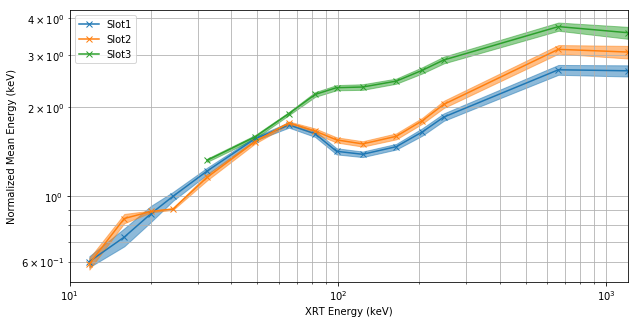

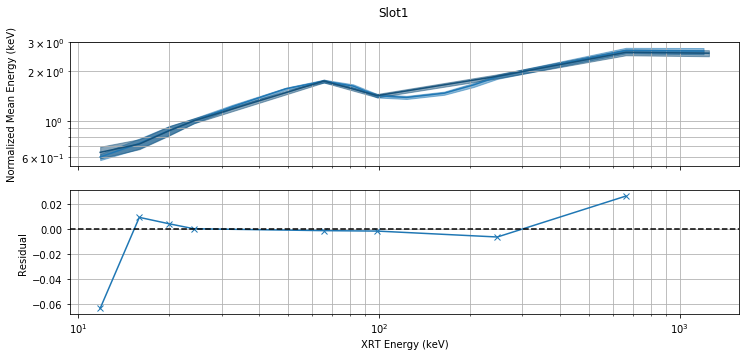

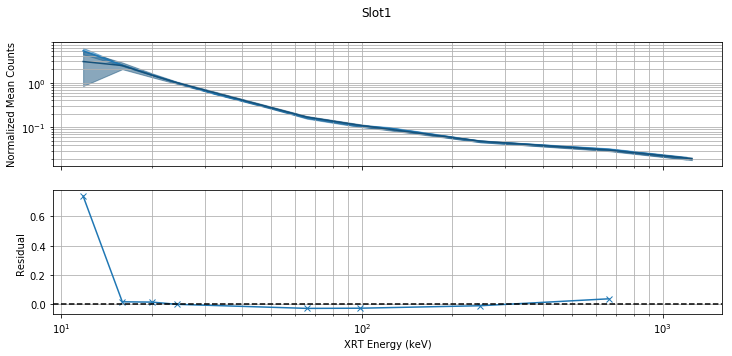

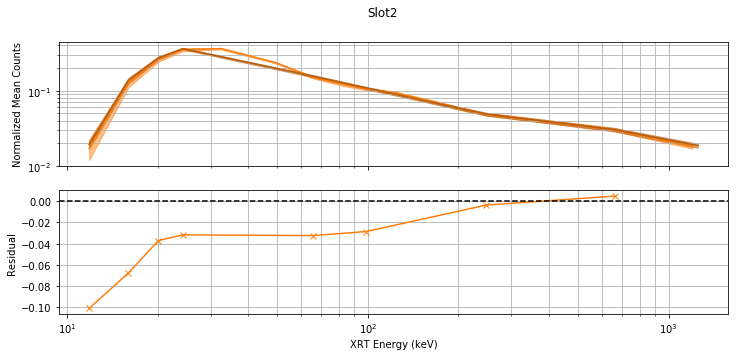

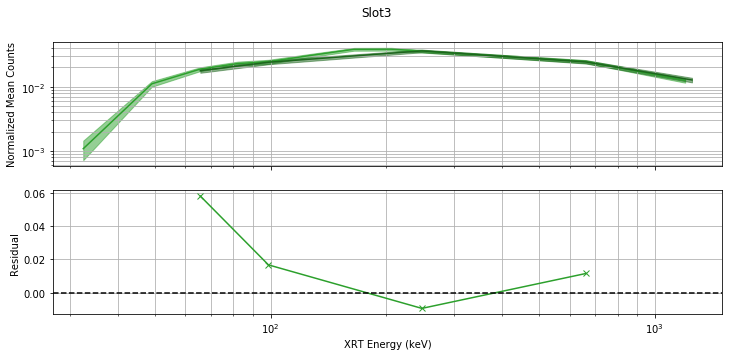

In [116]:
plotHistInfo([dataDictMay, dataDictMayAngle30], edges, ROOT=[False, False], firstNorm=True, xlim=(10, 1200), ylim=(0.5, 10)) # (0.4, 2))
# plotHistInfo(dataDictMay, edges, doseNorm=fluenceNorm, firstNorm=True, xlim=(15, 1200), ylim=(0.0001, 10)) # (0.4, 2)) # (10, 200))

In [50]:
def plotHistMatrix(dataDict, edges, energy, ROOT=False, slot=1, filt=False, conv=None):
    d = dataDict['Slot%d' % slot]
    if ROOT:
        largeIdx = np.asarray([True] * 192)
    else:
        largeIdx = isLarge( np.arange(256) )
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    if len(conv):
        # Get conversion factors slot
        conv = np.reshape(conv, (3, -1))
        conv = np.asarray(conv)[slot - 1]
        D = []

    hMean, N = [], []
    for h in d[energy][largeIdx]:
        hm = getHistMean(edges, h)
        hMean.append( hm )
        N.append(np.sum(h))
        
        if len(conv):
            D.append( np.dot(np.flip(np.asarray(h), 0), conv) )

    # Convert to arrays and get stats
    hMean = np.asarray( hMean )
    hMean[hMean == 0] = np.nan
    N = np.asarray( N )
    N[N == 0] = np.nan

    hm = np.nanmean(hMean)
    hstd = np.nanstd(hMean)
    Nm = np.nanmean(N)
    Nstd = np.nanstd(N)

    # Filter data
    if filt:
        hMean[abs(hMean - hm) > 3 * hstd] = np.nan
        N[abs(N - Nm) > 3 * Nstd] = np.nan

        hm, hstd = np.nanmean(hMean), np.nanstd(hMean) 
        Nm, Nstd = np.nanmean(N), np.nanstd(N)

    # Plots
    # Top
    im0 = ax[0][0].imshow(np.reshape(hMean, (16, -1)).T)
    im1 = ax[0][1].imshow(np.reshape(N, (16, -1)).T)
    
    # Bottom
    # Mean
    ax[1][0].hist(hMean[~np.isnan(hMean)], bins=50)
    ax[1][1].hist(N[~np.isnan(N)], bins=50)
    ax[1][0].axvline(x=hm, ls='-', c='k')
    ax[1][0].axvline(x=hm - hstd, ls='--', c='k')
    ax[1][0].axvline(x=hm + hstd, ls='--', c='k')

    # Counts
    ax[1][1].axvline(x=Nm, ls='-', c='k')
    ax[1][1].axvline(x=Nm - Nstd, ls='--', c='k')
    ax[1][1].axvline(x=Nm + Nstd, ls='--', c='k')
    ax[1][1].axvline(x=Nm - np.sqrt(Nm), ls='-.', c='k')
    ax[1][1].axvline(x=Nm + np.sqrt(Nm), ls='-.', c='k')
    
    # Labels
    ax[0][0].set_xlabel('x'), ax[0][0].set_ylabel('y')
    ax[0][1].set_xlabel('x'), ax[0][1].set_ylabel('y')
    
    # Titles
    ax[0][0].set_title('Mean Energy (keV)')
    ax[0][1].set_title('Counts')
    ax[1][0].set_title('Mean = %.2f keV, Std = %.2f keV' % (hm, hstd))
    ax[1][1].set_title('Mean = %.2f, Std = %.2f' % (Nm, Nstd))

    # Colorbar
    fig.colorbar(im0, ax=ax[0][0], fraction=0.046, pad=0.04, format='%.02e') # orientation='horizontal')
    fig.colorbar(im1, ax=ax[0][1], fraction=0.046, pad=0.04, format='%.02e') # orientation='horizontal')
    plt.tight_layout()
    plt.show()
    plt.close(fig)

    # Dose plot
    if len(conv):
        fDose, axDose = plt.subplots(2, 1, figsize=(5, 7))
        
        D = np.asarray( D )
        D[D == 0] = np.nan
        Dmean, Dstd = np.nanmean(D), np.nanstd(D)
        if filt:
            D[abs(D - Dmean) > 3 * Dstd] = np.nan
            D[abs(D - Dmean) > 3 * Dstd] = np.nan

            Dmean, Dstd = np.nanmean(D), np.nanstd(D) 

        imD = axDose[0].imshow(np.reshape(D, (16, -1)).T)
        axDose[1].hist(D[~np.isnan(D)], bins=50)
        
        axDose[0].set_xlabel('x'), axDose[0].set_ylabel('y')
        axDose[1].set_xlabel(r'Dose ($\mu$Sv)'), axDose[1].set_ylabel('Counts')
        axDose[1].axvline(x=Dmean, ls='-', c='k')
        axDose[1].axvline(x=Dmean - Dstd, ls='--', c='k')
        axDose[1].axvline(x=Dmean + Dstd, ls='--', c='k')

        # Title
        axDose[1].set_title(r'Mean = %.2f $\mu$Sv, Std = %.2f $\mu$Sv' % (Dmean, Dstd))
        
        fig.colorbar(imD, ax=axDose[0], fraction=0.046, pad=0.04)
        plt.tight_layout()
        plt.show()
        plt.close(fDose)

def getPixelDose(data, conv):
    return np.sum(np.asarray(data) * np.asarray(conv))

SEJveChjaGlsZHJlbj0oU2VsZWN0aW9uU2xpZGVyKGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J0VuZXJneSAoa2VWKTonLCBvcHRpb25zPSgxNSwgMjAsIDI1LCAzMCzigKY=


Output()

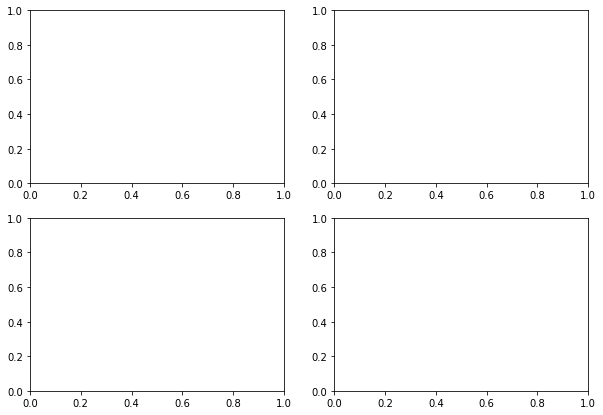

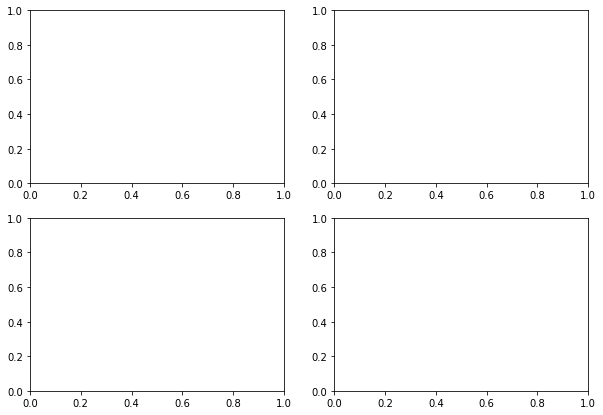

In [57]:
selSlider = widgets.SelectionSlider(
    options=sorted(dataDictMay['Slot1'].keys()),
    value=15,
    description='Energy (keV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

filterCheck = widgets.Checkbox(
    value=False,
    description='3 sigma filter',
    disabled=False
)

ui = widgets.HBox([selSlider, filterCheck])
convFacs = ['GeantAlpha.csv', 'conversionFit_wSim_10.csv']
convFac = pcs.getConversionFactorsFile(convFacs[0])
out = widgets.interactive_output(lambda idx, filt: plotHistMatrix(dataDictMayAngle60, edges['vac'], energy=idx, slot=1, filt=filt, conv=convFac), {'idx': selSlider, 'filt': filterCheck})
display(ui, out)

In [58]:
def plotHistDose(dataDict, edges, energy, conv, ROOT=False, filt=False, dose=True, mean=False, counts=False):
    if ROOT:
        largeIdx = np.asarray([True] * 192)
    else:
        largeIdx = isLarge( np.arange(256) )
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))

    conv = np.reshape(conv, (3, -1))
    
    mList, NList, DList = [], [], []
    slotNames = ['vac', 'al', 'sn']
    for slot in range(1, 3 + 1):
        d = dataDict['Slot%d' % slot]
        # Get conversion factors slot
        c = np.asarray(conv)[slot - 1]
        m, D, N = [], [], []
        
        for h in d[energy][largeIdx]:
            D.append(np.dot(np.flip(np.asarray(h), 0), c))
            m.append(getHistMean(edges[slotNames[slot - 1]], h))
            N.append(np.sum(h))

        DList.append( D ), mList.append( m ), NList.append( N )
        
    DList, mList, NList = np.asarray( DList ), np.asarray( mList ), np.asarray( NList )
    DList[DList == 0], mList[mList == 0], NList[NList == 0] = np.nan, np.nan, np.nan

    labelList = ['Dose', 'Mean', 'Counts']
    dataList = [DList, mList, NList]
    for k, cond in enumerate([dose, mean, counts]):
        if not cond:
            continue
            
        # Select data
        data = dataList[k]
        display(Markdown('## %s' % labelList[k]))
            
        plt.clf()
        fig, ax = plt.subplots(2, 3, figsize=(13, 6))
        for i in range(3):
            m, s = np.nanmean(data[i]), np.nanstd(data[i])
            # Filter
            if filt:
                data[i][abs(data[i] - m) > 3 * s] = np.nan
                m, s = np.nanmean(data[i]), np.nanstd(data[i])

            ax[0][i].imshow(np.reshape(data[i], (16, -1)).T)
            ax[0][i].set_title('Slot %d' % (i + 1))
            ax[1][i].hist(data[i][~np.isnan(data[i])], bins=50)
  
            ax[1][i].axvline(x=m, ls='-', c='k')
            ax[1][i].axvline(x=m-s, ls='--', c='k')
            ax[1][i].axvline(x=m+s, ls='--', c='k')
            
            ax[1][i].set_title('Mean = %.3f, Std = %.3f' % (m, s))
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)
        
        fig, ax = plt.subplots(figsize=(7, 3))
        data = np.asarray( data )
        data = data[data > 1.e-3].flatten()
        m, s = np.nanmean(data), np.nanstd(data)
        ax.hist(data, bins=100)
        ax.axvline(x=m, ls='-', c='k')
        ax.axvline(x=m-s, ls='--', c='k')
        ax.axvline(x=m+s, ls='--', c='k')
        plt.show()
        plt.close(fig)
        

SEJveChjaGlsZHJlbj0oU2VsZWN0aW9uU2xpZGVyKGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J0VuZXJneSAoa2VWKTonLCBvcHRpb25zPSgxNSwgMjAsIDI1LCAzMCzigKY=


Output()

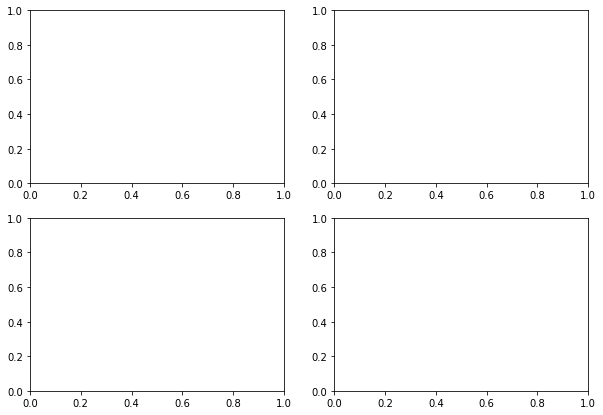

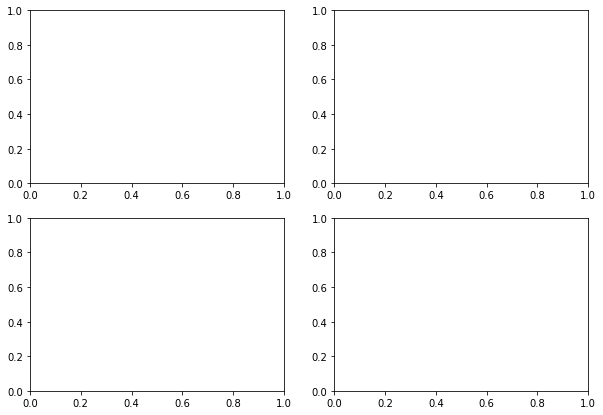

In [61]:
selSlider = widgets.SelectionSlider(
    options=sorted(dataDictMay['Slot1'].keys()),
    value=15,
    description='Energy (keV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

filterCheck = widgets.Checkbox(
    value=False,
    description='3 sigma filter',
    disabled=False
)

ui = widgets.HBox([selSlider, filterCheck])
convFacs = ['GeantAlpha.csv', 'conversionFit_wSim_10.csv']
convFac = pcs.getConversionFactorsFile(convFacs[0])
out = widgets.interactive_output(lambda idx, filt: plotHistDose(dataDictMayAngle60, edges, energy=idx, conv=convFac, ROOT=False, filt=filt, dose=True, mean=True, counts=True), {'idx': selSlider, 'filt': filterCheck})
display(ui, out)

## Energy matrices

In [182]:
def plotEnergyMatrix(dataDict, energy, dataBin=0):
    largeIdx = isLarge( np.arange(256) )

    fig, ax = plt.subplots(2, 3, figsize=(12, 7))
    for slot in range(1, 3 + 1):
        data = np.asarray(dataDict['Slot%d' % slot][energy][largeIdx])[:,dataBin]
        data[data == 0] = np.nan
        ax[0][slot - 1].imshow(np.reshape(data, (16, -1)).T)
        ax[1][slot - 1].hist(data[~np.isnan(data)], bins=30)
        
        m, s = np.nanmean(data), np.nanstd(data)
        ax[1][slot - 1].axvline(x=m, ls='-', c='k')
        ax[1][slot - 1].axvline(x=m - s, ls='--', c='k')
        ax[1][slot - 1].axvline(x=m + s, ls='--', c='k')
        ax[1][slot - 1].set_xlabel('Counts per pixel')
        ax[1][slot - 1].set_ylabel('# of pixels')
        
        ax[0][slot - 1].set_title('Slot %d (%.2e Events)' % (slot, np.nansum(data)))
        ax[1][slot - 1].set_title('Mean = %.2f, Std = %.2f' % (m, s))
        
    plt.tight_layout()
    plt.show()
    plt.close(fig)

In [181]:
# plotEnergyMatrix(dataDictMay, 20)
interact(lambda idx: plotEnergyMatrix(dataDictMay, energy=15, dataBin=idx), idx=widgets.IntSlider(min=0, max=15, step=1, value=0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2lkeCcsIG1heD0xNSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnRlcmHigKY=


<function __main__.<lambda>>

## Al Cap Analysis

In [ ]:
def capAnalysis(dataDict, energy, mu, slot=1, dataBin=0):
    largeIdx = isLarge( np.arange(256) )

    data = np.asarray(dataDict['Slot%d' % slot][energy][largeIdx])[:,dataBin]
    data[data == 0] = np.nan
    data = np.reshape(data, (16, -1))
            
    # Find center
    s1, s2 = np.nansum(data, axis=0), np.nansum(data, axis=1)
    
    '''
    for s in [s1, s2]:
        plt.step(np.arange(len(s)), s, where='mid')
        plt.axhline(y=np.nanmean(s), ls='-', c='k')
        plt.axhline(y=np.nanmean(s) - np.nanstd(s), ls='--', c='k')
        plt.axhline(y=np.nanmean(s) + np.nanstd(s), ls='--', c='k')
        plt.axhline(y=np.nanmean(s) - np.sqrt(np.nanmean(s)), ls='-.', c='k')
        plt.axhline(y=np.nanmean(s) + np.sqrt(np.nanmean(s)), ls='-.', c='k')
        plt.show()
    '''
    
    # Insert circle finding here
    c = (7, 6) # (16/2, 14/2)
    
    print(data.shape)
    
    # Draw circles around center and get total number of counts
    countsList, areaList = [], []
    countFrac = []
    for r in range(1, 10):
        # Get box around circle
        b1 = np.asarray(c) - r
        b2 = np.asarray(c) + r
        for b in [b1, b2]:
            b[0] = 0 if b[0] < 0 else b[0]
            b[0] = 15 if b[0] > 15 else b[0]
            b[1] = 0 if b[0] < 0 else b[1]
            b[1] = 11 if b[0] > 11 else b[1]
            
        # Get points within circle
        p_grid = np.mgrid[b1[0]:b2[0],b1[1]:b2[1]]
    
        px, py = p_grid
        px, py = px.flatten(), py.flatten()
        dist = np.sqrt( np.square(px - c[0]) + np.square(py - c[1]) )
        px, py = px[dist <= r], py[dist <= r]
        
        # print(px, py)
        counts = np.nansum(data[px, py])
        countsList.append( counts )
        area = len(px)
        areaList.append( area )
        
        try:
            cs = counts - np.nansum(countsList[-2])
            ar = area - np.nansum(areaList[-2])
        except:
            cs = counts
            ar = area 
            
        print(cs, ar)
        countFrac.append(cs / ar)
    
    plt.plot(range(1, 10), countFrac)
    plt.show()
    
    # Calculate count fraction in relation to edges
    frac = np.asarray(countFrac) / countFrac[-1]
    d = 0.2 - 1./mu * np.log(frac)
    plt.plot(d)
    plt.xlabel('Radius (pixel)')
    plt.ylabel(r'Thickness (cm)')
    plt.show()
    
    fig, ax = plt.subplots()
    ax.imshow(data.T)
    ax.plot(c[0], c[1], marker='+', markersize=20, c='white')
    for radius in range(1, 10):
        circle = plt.Circle(c, radius, color='k', ls='-', fill=False)
        ax.add_artist(circle)
    plt.show()

In [ ]:
capAnalysis(dataDictMay, 30, mu=2.055*2.7, slot=2, dataBin=1)

## Load ROOT spectra

['random', 'wDetector', '255keV', '2.root']
random_wDetector_255keV_1.root
random_wDetector_255keV_2.root
random_wDetector_255keV_3.root
['random', 'wDetector', '510keV', '1.root']
random_wDetector_510keV_1.root
random_wDetector_510keV_2.root
random_wDetector_510keV_3.root
['random', 'wDetector', '385keV', '2.root']
random_wDetector_385keV_1.root
random_wDetector_385keV_2.root
random_wDetector_385keV_3.root
786217.419936
['random', 'wDetector', '70keV', '1.root']
random_wDetector_70keV_1.root
random_wDetector_70keV_2.root
random_wDetector_70keV_3.root
1125852.27017
['random', 'wDetector', '275keV', '2.root']
random_wDetector_275keV_1.root
random_wDetector_275keV_2.root
random_wDetector_275keV_3.root
767102.237545
['random', 'wDetector', '355keV', '1.root']
random_wDetector_355keV_1.root
random_wDetector_355keV_2.root
random_wDetector_355keV_3.root
['random', 'wDetector', '56keV', '3.root']
random_wDetector_56keV_1.root
random_wDetector_56keV_2.root
random_wDetector_56keV_3.root
1155523

1277567.34824
['random', 'wDetector', '31keV', '1.root']
random_wDetector_31keV_1.root
random_wDetector_31keV_2.root
random_wDetector_31keV_3.root
1292981.28384
['random', 'wDetector', '101keV', '3.root']
random_wDetector_101keV_1.root
random_wDetector_101keV_2.root
random_wDetector_101keV_3.root
['random', 'wDetector', '250keV', '2.root']
random_wDetector_250keV_1.root
random_wDetector_250keV_2.root
random_wDetector_250keV_3.root
['random', 'wDetector', '81keV', '3.root']
random_wDetector_81keV_1.root
random_wDetector_81keV_2.root
random_wDetector_81keV_3.root
1113745.15966
['random', 'wDetector', '198keV', '2.root']
random_wDetector_198keV_1.root
random_wDetector_198keV_2.root
random_wDetector_198keV_3.root
1126340.57055
['random', 'wDetector', '67keV', '1.root']
random_wDetector_67keV_1.root
random_wDetector_67keV_2.root
random_wDetector_67keV_3.root
1130040.20532
['random', 'wDetector', '49keV', '3.root']
random_wDetector_49keV_1.root
random_wDetector_49keV_2.root
random_wDetector_

1150257.35091
['random', 'wDetector', '174keV', '3.root']
random_wDetector_174keV_1.root
random_wDetector_174keV_2.root
random_wDetector_174keV_3.root
['random', 'wDetector', '90keV', '2.root']
random_wDetector_90keV_1.root
random_wDetector_90keV_2.root
random_wDetector_90keV_3.root
1109036.30955
['random', 'wDetector', '142keV', '3.root']
random_wDetector_142keV_1.root
random_wDetector_142keV_2.root
random_wDetector_142keV_3.root
['random', 'wDetector', '79keV', '3.root']
random_wDetector_79keV_1.root
random_wDetector_79keV_2.root
random_wDetector_79keV_3.root
1115121.58394
['random', 'wDetector', '200keV', '3.root']
random_wDetector_200keV_1.root
random_wDetector_200keV_2.root
random_wDetector_200keV_3.root
1126993.20017
['random', 'wDetector', '102keV', '3.root']
random_wDetector_102keV_1.root
random_wDetector_102keV_2.root
random_wDetector_102keV_3.root
['random', 'wDetector', '76keV', '2.root']
random_wDetector_76keV_1.root
random_wDetector_76keV_2.root
random_wDetector_76keV_3.ro

['random', 'wDetector', '104keV', '1.root']
random_wDetector_104keV_1.root
random_wDetector_104keV_2.root
random_wDetector_104keV_3.root
1104678.12036
['random', 'wDetector', '365keV', '1.root']
random_wDetector_365keV_1.root
random_wDetector_365keV_2.root
random_wDetector_365keV_3.root
['random', 'wDetector', '190keV', '3.root']
random_wDetector_190keV_1.root
random_wDetector_190keV_2.root
random_wDetector_190keV_3.root
1123142.54686
['random', 'wDetector', '41keV', '1.root']
random_wDetector_41keV_1.root
random_wDetector_41keV_2.root
random_wDetector_41keV_3.root
['random', 'wDetector', '535keV', '1.root']
random_wDetector_535keV_1.root
random_wDetector_535keV_2.root
random_wDetector_535keV_3.root
['random', 'wDetector', '101keV', '2.root']
random_wDetector_101keV_1.root
random_wDetector_101keV_2.root
random_wDetector_101keV_3.root
['random', 'wDetector', '42keV', '3.root']
random_wDetector_42keV_1.root
random_wDetector_42keV_2.root
random_wDetector_42keV_3.root
['random', 'wDetector

['random', 'wDetector', '54keV', '1.root']
random_wDetector_54keV_1.root
random_wDetector_54keV_2.root
random_wDetector_54keV_3.root
['random', 'wDetector', '176keV', '1.root']
random_wDetector_176keV_1.root
random_wDetector_176keV_2.root
random_wDetector_176keV_3.root
['random', 'wDetector', '93keV', '2.root']
random_wDetector_93keV_1.root
random_wDetector_93keV_2.root
random_wDetector_93keV_3.root
['random', 'wDetector', '215keV', '3.root']
random_wDetector_215keV_1.root
random_wDetector_215keV_2.root
random_wDetector_215keV_3.root
['random', 'wDetector', '110keV', '2.root']
random_wDetector_110keV_1.root
random_wDetector_110keV_2.root
random_wDetector_110keV_3.root
['random', 'wDetector', '15keV', '1.root']
random_wDetector_15keV_1.root
random_wDetector_15keV_2.root
random_wDetector_15keV_3.root
1426551.97442
['random', 'wDetector', '72keV', '3.root']
random_wDetector_72keV_1.root
random_wDetector_72keV_2.root
random_wDetector_72keV_3.root
1122093.32944
['random', 'wDetector', '172k

['random', 'wDetector', '64keV', '3.root']
random_wDetector_64keV_1.root
random_wDetector_64keV_2.root
random_wDetector_64keV_3.root
1135934.04676
['random', 'wDetector', '90keV', '1.root']
random_wDetector_90keV_1.root
random_wDetector_90keV_2.root
random_wDetector_90keV_3.root
['random', 'wDetector', '119keV', '2.root']
random_wDetector_119keV_1.root
random_wDetector_119keV_2.root
random_wDetector_119keV_3.root
['random', 'wDetector', '72keV', '2.root']
random_wDetector_72keV_1.root
random_wDetector_72keV_2.root
random_wDetector_72keV_3.root
['random', 'wDetector', '32keV', '3.root']
random_wDetector_32keV_1.root
random_wDetector_32keV_2.root
random_wDetector_32keV_3.root
1285699.592
['random', 'wDetector', '92keV', '3.root']
random_wDetector_92keV_1.root
random_wDetector_92keV_2.root
random_wDetector_92keV_3.root
['random', 'wDetector', '500keV', '1.root']
random_wDetector_500keV_1.root
random_wDetector_500keV_2.root
random_wDetector_500keV_3.root
['random', 'wDetector', '32keV', '2

['random', 'wDetector', '115keV', '1.root']
random_wDetector_115keV_1.root
random_wDetector_115keV_2.root
random_wDetector_115keV_3.root
['random', 'wDetector', '63keV', '3.root']
random_wDetector_63keV_1.root
random_wDetector_63keV_2.root
random_wDetector_63keV_3.root
['random', 'wDetector', '79keV', '1.root']
random_wDetector_79keV_1.root
random_wDetector_79keV_2.root
random_wDetector_79keV_3.root
['random', 'wDetector', '114keV', '3.root']
random_wDetector_114keV_1.root
random_wDetector_114keV_2.root
random_wDetector_114keV_3.root
1104302.06637
['random', 'wDetector', '37keV', '1.root']
random_wDetector_37keV_1.root
random_wDetector_37keV_2.root
random_wDetector_37keV_3.root
['random', 'wDetector', '118keV', '1.root']
random_wDetector_118keV_1.root
random_wDetector_118keV_2.root
random_wDetector_118keV_3.root
['random', 'wDetector', '33keV', '3.root']
random_wDetector_33keV_1.root
random_wDetector_33keV_2.root
random_wDetector_33keV_3.root
['random', 'wDetector', '41keV', '2.root']


['random', 'wDetector', '43keV', '1.root']
random_wDetector_43keV_1.root
random_wDetector_43keV_2.root
random_wDetector_43keV_3.root
['random', 'wDetector', '53keV', '2.root']
random_wDetector_53keV_1.root
random_wDetector_53keV_2.root
random_wDetector_53keV_3.root
['random', 'wDetector', '66keV', '1.root']
random_wDetector_66keV_1.root
random_wDetector_66keV_2.root
random_wDetector_66keV_3.root
['random', 'wDetector', '32keV', '1.root']
random_wDetector_32keV_1.root
random_wDetector_32keV_2.root
random_wDetector_32keV_3.root
['random', 'wDetector', '50keV', '3.root']
random_wDetector_50keV_1.root
random_wDetector_50keV_2.root
random_wDetector_50keV_3.root
['random', 'wDetector', '57keV', '2.root']
random_wDetector_57keV_1.root
random_wDetector_57keV_2.root
random_wDetector_57keV_3.root
['random', 'wDetector', '67keV', '2.root']
random_wDetector_67keV_1.root
random_wDetector_67keV_2.root
random_wDetector_67keV_3.root
['random', 'wDetector', '132keV', '3.root']
random_wDetector_132keV_1

['random', 'wDetector', '114keV', '1.root']
random_wDetector_114keV_1.root
random_wDetector_114keV_2.root
random_wDetector_114keV_3.root
['random', 'wDetector', '220keV', '3.root']
random_wDetector_220keV_1.root
random_wDetector_220keV_2.root
random_wDetector_220keV_3.root
['random', 'wDetector', '182keV', '1.root']
random_wDetector_182keV_1.root
random_wDetector_182keV_2.root
random_wDetector_182keV_3.root
['random', 'wDetector', '14keV', '3.root']
random_wDetector_14keV_1.root
random_wDetector_14keV_2.root
random_wDetector_14keV_3.root
['random', 'wDetector', '35keV', '1.root']
random_wDetector_35keV_1.root
random_wDetector_35keV_2.root
random_wDetector_35keV_3.root
['random', 'wDetector', '152keV', '1.root']
random_wDetector_152keV_1.root
random_wDetector_152keV_2.root
random_wDetector_152keV_3.root
['random', 'wDetector', '178keV', '1.root']
random_wDetector_178keV_1.root
random_wDetector_178keV_2.root
random_wDetector_178keV_3.root
['random', 'wDetector', '194keV', '2.root']
rando

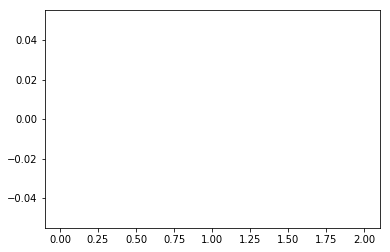

In [132]:
reload(gcf)
runDir = runDir = '../getConversionFactors/root_data/'
phantom_dir = '../phantom_simulation/dataAbsorber/'
binEdges = gcf.binEdgesTh

# Get fluenceDict
NEvents = 150000000
fluenceDict = gcfr.getFluenceFiles(phantom_dir, 10000000., NEvents)

# Get energyDict
energyDict, fluenceList = gcf.getEnergyDictROOT(runDir, binEdges, fluenceDict, spectrumBasis=1, multi=True)

# Rename energyDict keys
energyDict['Slot1'] = energyDict.pop('vac')
energyDict['Slot2'] = energyDict.pop('al')
energyDict['Slot3'] = energyDict.pop('sn')

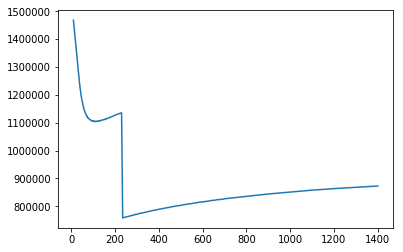

In [51]:
fluence = []
for energy in sorted(fluenceDict.keys()):
    fluence.append(fluenceDict[energy])
    
plt.plot(sorted(fluenceDict.keys()), fluence)

### Restructure dictionary

In [134]:
energyDictROOT = {}
NEvents = 10.e3 * 192
for slot in energyDict.keys():
    d = energyDict[slot]
    slotDict = {}
    for energy in d.keys():
        slotDict[energy] = np.flip(np.asarray( d[energy] ), axis=1) / fluenceDict[energy] * NEvents
    energyDictROOT[slot] = slotDict

### Simulation: Single Pixel Behaviour

In [62]:
energyList = sorted(energyDictROOT['Slot1'].keys())
print(energyList)
interact(lambda idx: plotHistEnergy(dataDictMay, edges['vac'], 60, ROOT=energyDictROOT, slot=1, idx=idx), idx=play)

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


NameError: name 'play' is not defined

### Simulation: Matrix Analysis

In [183]:
selSlider = widgets.SelectionSlider(
    options=sorted(energyDictROOT['Slot1'].keys()),
    value=15,
    description='Energy (keV):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

filterCheck = widgets.Checkbox(
    value=False,
    description='3 sigma filter',
    disabled=False
)

ui = widgets.HBox([selSlider, filterCheck])
convFacs = ['GeantAlpha.csv', 'conversionFit_wSim_10.csv']
convFac = pcs.getConversionFactorsFile(convFacs[0])
out = widgets.interactive_output(lambda idx, filt: plotHistMatrix(energyDictROOT, edges['vac'], ROOT=True, energy=idx, slot=1, filt=filt, conv=convFac), {'idx': selSlider, 'filt': filterCheck})
display(ui, out)

IOError: Initializing from file failed

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


[[3]]
[[16]]


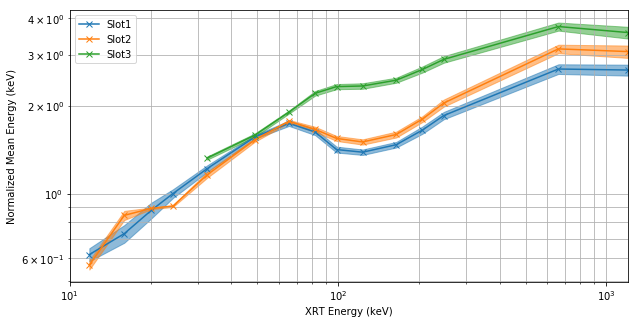

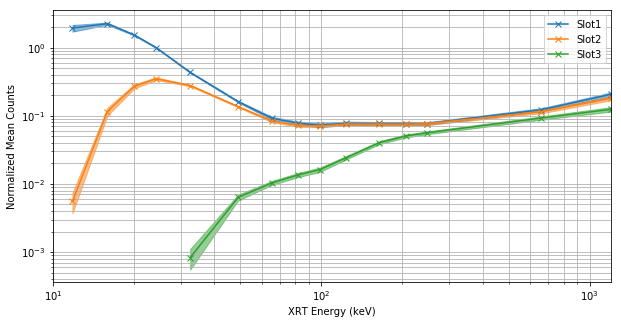

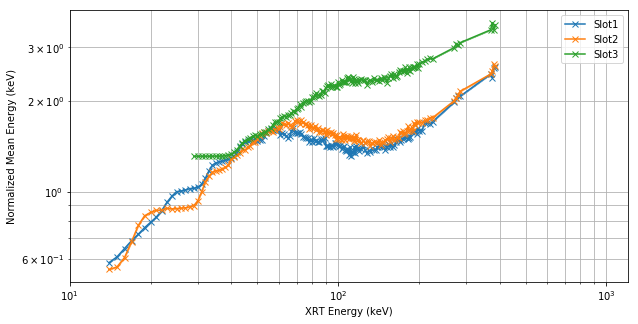

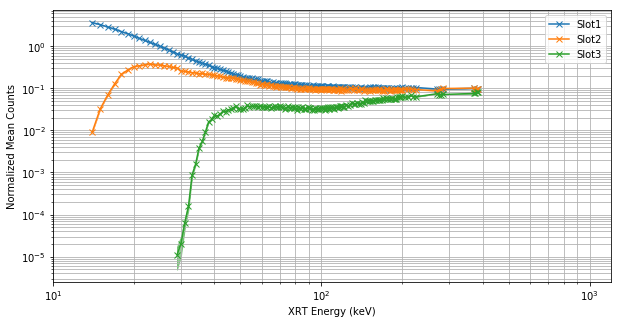

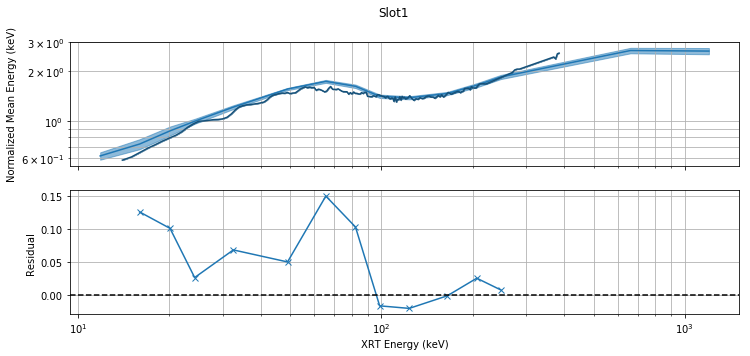

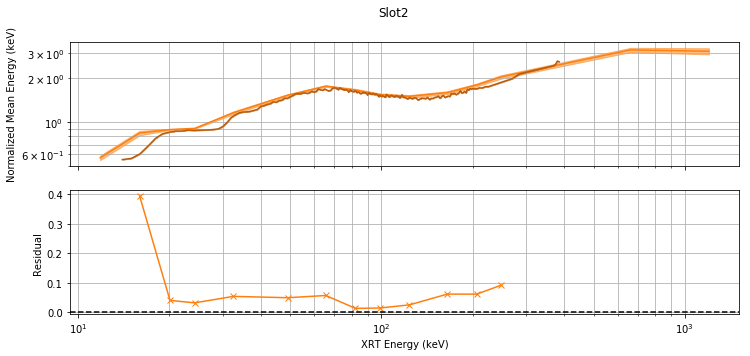

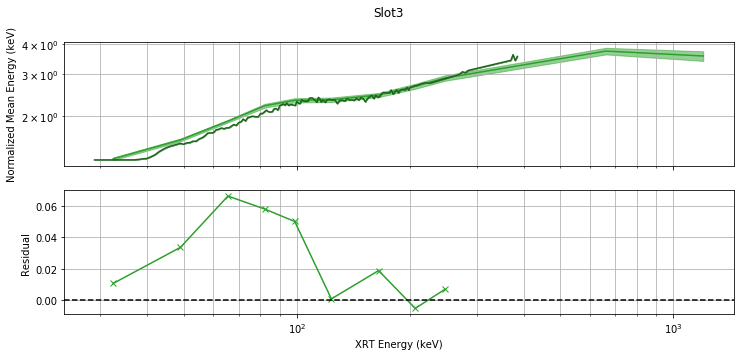

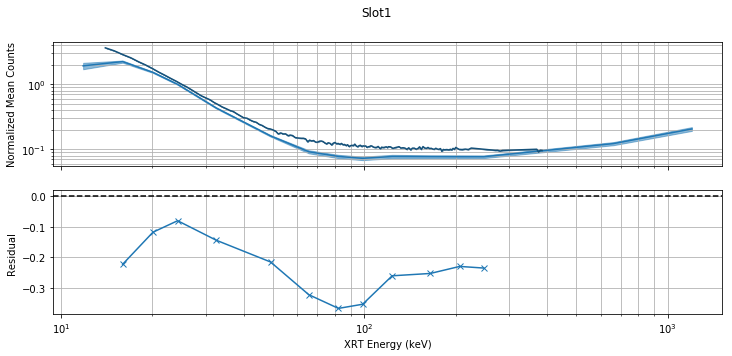

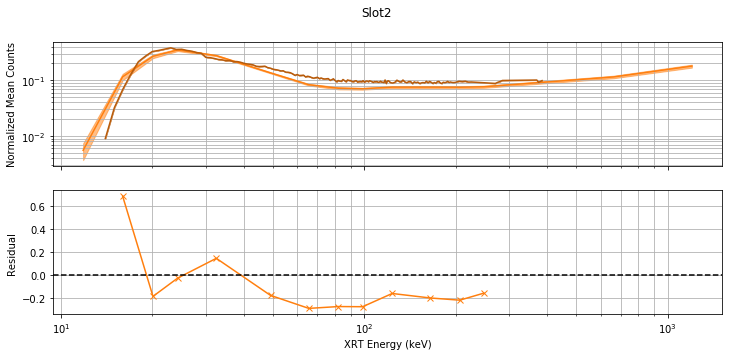

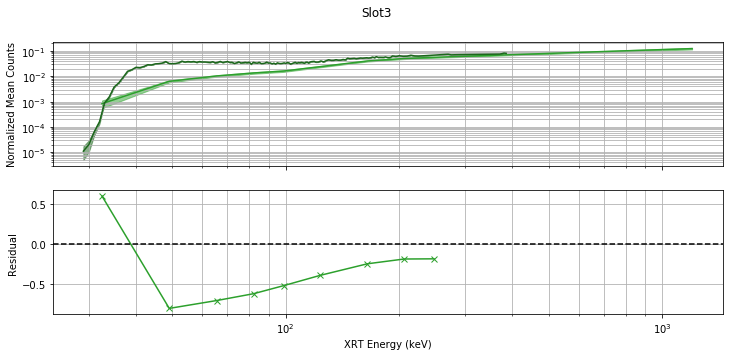

In [135]:
plotHistInfo([dataDictMay, energyDictROOT], edges, doseNorm=fluenceNorm, ROOT=[False, True], norm=False, firstNorm=True, xlim=(10, 1200), ylim=(0.0001, 10)) # (0.4, 2))